Here I will check the jfs theory against simulations run using Ali's truncated coalescent simulator (not a Moran simulator) 

In [9]:
import pandas as pd
import numpy as np
import pickle
np.set_printoptions(formatter={'float': '{: 0.4f}'.format})
folder = '/home/farid/Documents/git/jfsNumerics/'
data_folder = folder+'data/'

In [10]:
#The simulated jfs distribution was calculated in a seperate Python script
with open("/home/farid/Documents/NonGitCode/JFSDist5E4", "rb") as file: 
    jfsDist_sim = pickle.load(file)

In [11]:
jfsDist_sim = 1/2 * (jfsDist_sim + np.transpose(jfsDist_sim))
jfsDist_sim /= np.sum(jfsDist_sim)

In [12]:
#importing theoretical calculations which were done in Mathematica
from functools import reduce
# with open(folder+'data/JFSn10.csv'
#           ,'rb') as f:
#     depth=np.fromfile(f,dtype=np.dtype('int32'),count=1)
#     dims =np.fromfile(f,dtype=np.dtype('int32'),count=depth[0])
#     jfs10 =np.reshape(np.fromfile(f,dtype=np.dtype('float64'),
#          count=reduce(lambda x,y:x*y,dims)),dims)
jfs10 = np.loadtxt(data_folder+"JFSn10.csv", delimiter=',', skiprows=0)


In [13]:
with open(folder+'Mathematica/JointFreqSpectrum10_StepChangeTau25c2',
          'rb') as f: 
    depth=np.fromfile(f, dtype=np.dtype('int32'), count=1)
    dims = np.fromfile(f,dtype=np.dtype('int32'),count=depth[0])
    jfs_stepChange_25_2_theory=np.reshape(np.fromfile(f,dtype=np.dtype('float64'),
                                                count=reduce(lambda x,y:x*y,dims)), dims)

In [14]:
relative_diff = (jfs10-jfs_stepChange_25_2_theory)/jfs10

In [15]:
import matplotlib.pyplot as plt
import seaborn as sbn

sbn.set()
plt.rcParams["font.family"] = "monospace"

In [16]:
log_sim = np.log(jfsDist_sim)
log_theory = np.log(jfs10)
log_stepChange_25_2_theory = np.log(jfs_stepChange_25_2_theory)

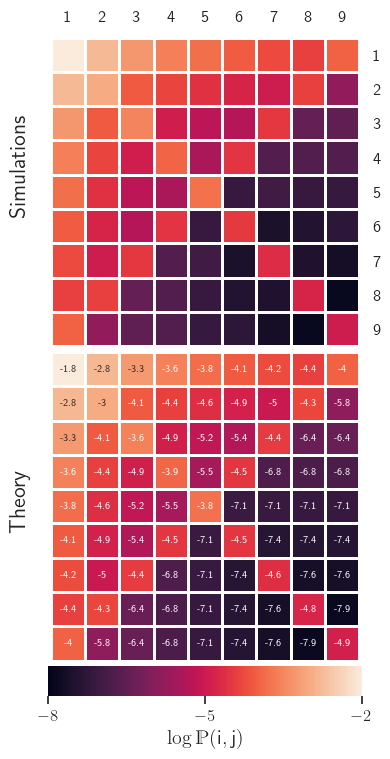

In [17]:
sbn.set(rc={'text.usetex':True, 'font.family':'sans-serif', 'font.sans-serif':'DejaVu Sans'})
plt.rc('text.latex', preamble=r'\usepackage{amsmath, amsfonts, dsfont}')
# fig, (ax1, ax2, ax4) = plt.subplots(3,1, 
#                                    sharey=False, 
#                                    sharex=False, 
#                                    figsize=(4.5,9),
#                                    )

fig = plt.figure(figsize=(4.5,9))

num_columns = 20
num_rows = 20

ax1 = plt.subplot2grid((num_rows,num_columns), (0,0), colspan=20, rowspan=9)
ax2 = plt.subplot2grid((num_rows,num_columns), (9,0), colspan=20, rowspan=9)
ax4 = plt.subplot2grid((num_rows,num_columns), (18,1), colspan=18, rowspan=1)

# ax4 = fig.add_axes([36/37, 0.19, 1/37, 0.61])
frequencies = [i for i in range(1,10)]

sbn.heatmap(
    log_sim,
    ax=ax1,
    linewidths=2.0,
    vmin=-8,
    vmax=-2,
    square=True,
    xticklabels=frequencies,
    yticklabels=frequencies,
    cbar=True,
    cbar_kws = {"label":r"\Large$\mathsf{\log \mathds{P}(i,j)}$", 
                "ticks":[-8,-5, -2], 
                "orientation":"horizontal",
                },
    cbar_ax=ax4,
    cmap='rocket')

sbn.heatmap(
    log_theory,
    ax=ax2,
    linewidths=2.0,
    vmin=-8,
    vmax=-2,
    square=True,
    xticklabels=[],
    yticklabels=[],
    cbar=False,
    cmap='rocket',
    annot=True,
    annot_kws={"fontsize":7})

ax1.tick_params(labelright=True, 
                labelleft=False, 
                labeltop=True,
                labelbottom=False,
                labelrotation=0,
                labelsize=12)
ax1.set_title("Simulations", rotation=90, x=-0.1, y=0.4, fontsize=16)

ax2.set_title("Theory", rotation=90, x=-0.1, y=0.4, fontsize=16)
ax4.tick_params(labelsize=12)
plt.show()

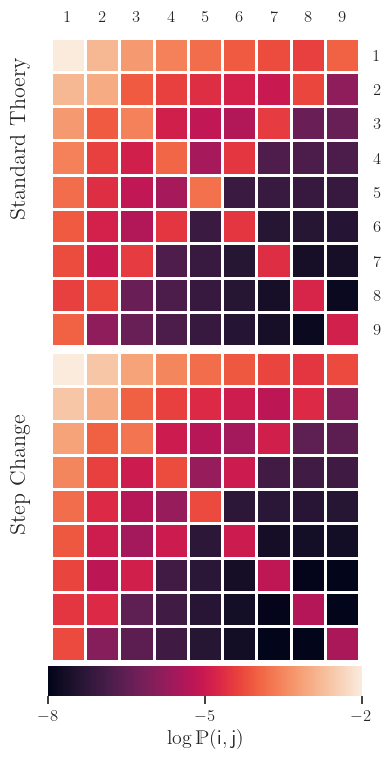

In [18]:
sbn.set_theme(rc={'text.usetex':True, 'font.family':'sans', 'font.sans-serif':'DejaVu Sans'})
plt.rc('text.latex', preamble=r'\usepackage{amsmath, amsfonts, dsfont}')
# fig, (ax1, ax2, ax4) = plt.subplots(3,1, 
#                                    sharey=False, 
#                                    sharex=False, 
#                                    figsize=(4.5,9),
#                                    )

fig = plt.figure(figsize=(4.5,9))

num_columns = 20
num_rows = 20

ax1 = plt.subplot2grid((num_rows,num_columns), (0,0), colspan=20, rowspan=9)
ax2 = plt.subplot2grid((num_rows,num_columns), (9,0), colspan=20, rowspan=9)
ax4 = plt.subplot2grid((num_rows,num_columns), (18,1), colspan=18, rowspan=1)

# ax4 = fig.add_axes([36/37, 0.19, 1/37, 0.61])
frequencies = [i for i in range(1,10)]

sbn.heatmap(
    log_theory,
    ax=ax1,
    linewidths=2.0,
    vmin=-8,
    vmax=-2,
    square=True,
    xticklabels=frequencies,
    yticklabels=frequencies,
    cbar=True,
    cbar_kws = {"label":r"\Large$\mathsf{\log \mathds{P}(i,j)}$", 
                "ticks":[-8,-5, -2], 
                "orientation":"horizontal",
                },
    cbar_ax=ax4,
    cmap='rocket')

sbn.heatmap(
    log_stepChange_25_2_theory,
    ax=ax2,
    linewidths=2.0,
    vmin=-8,
    vmax=-2,
    square=True,
    xticklabels=[],
    yticklabels=[],
    cbar=False,
    cmap='rocket')

ax1.tick_params(labelright=True, 
                labelleft=False, 
                labeltop=True,
                labelbottom=False,
                labelrotation=0,
                labelsize=12)
ax1.set_title("Standard Thoery", rotation=90, x=-0.1, y=0.4, fontsize=16)

ax2.set_title("Step Change", rotation=90, x=-0.1, y=0.4, fontsize=16)
ax4.tick_params(labelsize=12)
plt.show()

In [19]:
logSimsCsv = [np.array([i+1,j+1, log_sim[i,j]]) for i in range(9) for j in range(9)]
logTheoryCsv = [np.array([i+1,j+1, log_theory[i,j]]) for i in range(9) for j in range(9)]

In [20]:
logSimsCsv = np.asarray(logSimsCsv)
logTheoryCsv = np.asarray(logTheoryCsv)

In [21]:
np.savetxt('Logsims.csv', logSimsCsv, delimiter=',', header='', comments='')
np.savetxt('Logtheory.csv', logTheoryCsv, delimiter=',', header='', comments='')

In [22]:
relative_error = (jfs10-jfsDist_sim)/jfsDist_sim

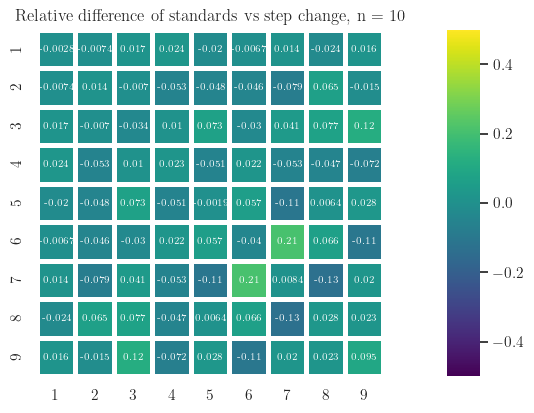

In [23]:
fix, (ax1,ax2) = plt.subplots(1,2, 
                             sharey = False,
                             sharex = False,
                             figsize = (6,4.5),
                             gridspec_kw={'width_ratios':[12,1]}) 
sbn.heatmap(
    relative_error,
    ax=ax1,
    linewidths=2.5,
    vmin=-0.5,
    vmax=0.5,
    square=True,
    xticklabels=frequencies,
    yticklabels=frequencies,
    cbar=True,
    cbar_kws={'shrink':0.4},
    cbar_ax=ax2,
    cmap='viridis',
    annot=True,
    annot_kws={"fontsize":7})

ax1.set_title("Relative difference of standards vs step change, n = 10")
plt.show()

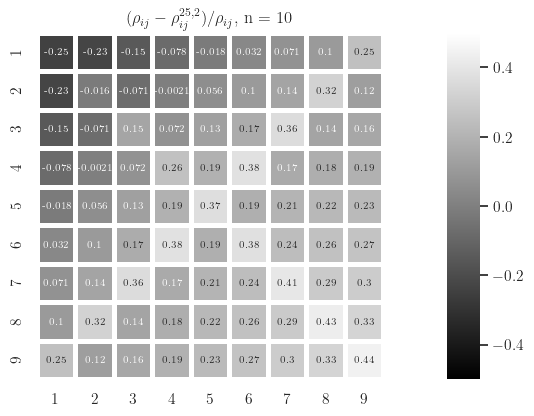

In [24]:
fix, (ax1,ax2) = plt.subplots(1,2, 
                             sharey = False,
                             sharex = False,
                             figsize = (6,4.5),
                             gridspec_kw={'width_ratios':[12,1]}) 
sbn.heatmap(
    relative_diff,
    ax=ax1,
    linewidths=2.5,
    vmin=-0.5,
    vmax=0.5,
    square=True,
    xticklabels=frequencies,
    yticklabels=frequencies,
    cbar=True,
    cbar_kws={'shrink':0.4},
    cbar_ax=ax2,
    cmap='gray',
    annot=True,
    annot_kws={"fontsize":7})

ax1.set_title(r"$(\rho_{ij} - \rho_{ij}^{25,2})/\rho_{ij}$, n = 10")
plt.show()

In [25]:
from functools import reduce
with open(folder+'Mathematica/JointFreqSpectrum6'
          ,'rb') as f:
    depth=np.fromfile(f,dtype=np.dtype('int32'),count=1)
    dims =np.fromfile(f,dtype=np.dtype('int32'),count=depth[0])
    jfs6 =np.reshape(np.fromfile(f,dtype=np.dtype('float64'),
         count=reduce(lambda x,y:x*y,dims)),dims)

In [26]:
with open("/home/farid/Documents/NonGitCode/JFSDist2E5n6_100000_2", "rb") as file: 
    jfsDist6_sim = pickle.load(file)

jfsDist6_sim = 1/2 * (jfsDist6_sim + np.transpose(jfsDist6_sim))
jfsDist6_sim /= np.sum(jfsDist6_sim)

In [27]:
with open("/home/farid/Documents/NonGitCode/JFSDist2E5n6_500000_2", "rb") as file: 
    jfsDist6_ = pickle.load(file)

jfsDist6_ = 1/2 * (jfsDist6_ + np.transpose(jfsDist6_))
jfsDist6_ /= np.sum(jfsDist6_)

In [28]:
with open("/home/farid/Documents/NonGitCode/JFSDist2E5n6_1000000_2", "rb") as file: 
    jfsDist6_2 = pickle.load(file)

jfsDist6_2 = 1/2 * (jfsDist6_2 + np.transpose(jfsDist6_2))
jfsDist6_2 /= np.sum(jfsDist6_2)

In [29]:
relative_error_n6 = (jfs6-jfsDist6_sim)/jfsDist6_sim
relative_error_n6_ = (jfs6 - jfsDist6_)/jfsDist6_
relative_error_n6_2 = (jfs6 - jfsDist6_2)/jfsDist6_2

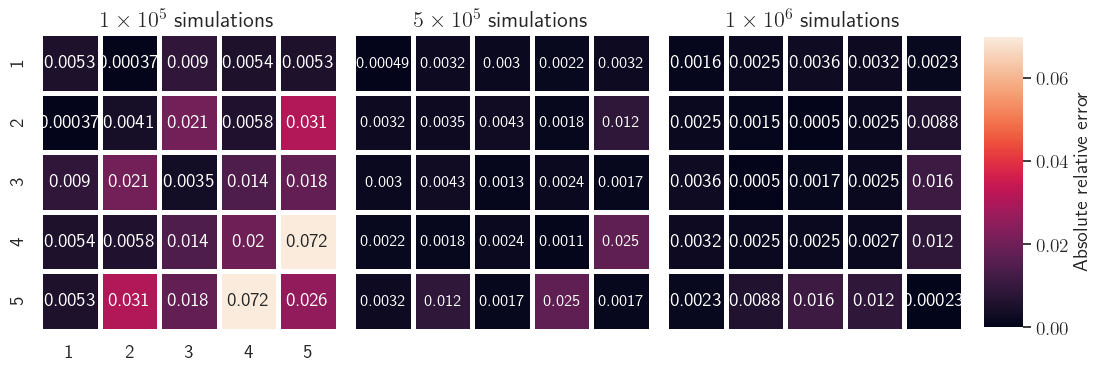

In [30]:
plt.rcParams.update({"text.usetex":True, 
                    "font.family": "sans-serif",
                    "font.sans-serif": "DejaVu Sans",})
# fig, (ax1,ax2, ax3,cbar_ax) = plt.subplots(1,4, 
#                              sharey = False,
#                              sharex = False,
#                              figsize = (13,4.5),
#                              gridspec_kw={}
#                             ) 

fig = plt.figure(figsize=(13,4.5))
# cbar_ax = fig.add_axes([0.915,0.17,0.03,0.65])

numrows = 100
numcolumns = 203

ax1 = plt.subplot2grid((numrows, numcolumns), (0,0), colspan=60, rowspan=100)
ax2 = plt.subplot2grid((numrows, numcolumns), (0,63), rowspan=100, colspan=60)
ax3 = plt.subplot2grid((numrows, numcolumns), (0,126), rowspan=100, colspan=60)
cbar_ax = plt.subplot2grid((numrows, numcolumns), (8,190), rowspan=84, colspan=8)

frequencies = [i for i in range(1,6)]
cbar_kws = dict(label= r"\Large Absolute relative error",
               ticks=[0,0.02,0.04,0.06],
               shrink=0.8)

sbn.heatmap(
    np.abs(relative_error_n6),
    ax=ax1,
    linewidths=2.5,
    vmin=0,
    vmax=0.07,
    square=True,
    xticklabels=frequencies,
    yticklabels=frequencies,
    cbar=True,
    cbar_ax=cbar_ax,
    cbar_kws=cbar_kws,
    cmap='rocket',
    annot=True,
    annot_kws={"fontsize":14})

sbn.heatmap(
    np.abs(relative_error_n6_),
    ax=ax2,
    linewidths=2.5,
    vmin=0,
    vmax=0.10,
    square=True,
    xticklabels=[],
    yticklabels=[],
    cbar=False,
    cmap='rocket',
    annot=True,
    annot_kws={"fontsize":12, 
               "family": "sans-serif"})

sbn.heatmap(
    np.abs(relative_error_n6_2),
    ax=ax3,
    linewidths=2.5,
    vmin=0,
    vmax=0.10,
    square=True,
    xticklabels=[],
    yticklabels=[],
    cbar=False,
    cmap='rocket',
    annot=True,
    annot_kws={"fontsize":14, 
               "family": "sans-serif"})

ax1.tick_params(labelsize=14)
cbar_ax.tick_params(labelsize=14)

ax1.set_title(r"$1 \times 10^5$ simulations", fontsize=16)
ax2.set_title(r" $5 \times 10^5$ simulations",fontsize=16)
ax3.set_title(r"$1 \times 10^6$ simulations",fontsize=16)


plt.show()

Now doing some analysis for $n=10$ to present in the poster

In [31]:
with open("/home/farid/Documents/NonGitCode/JFSDist10n100000", "rb") as file: 
    jfsDist10_1 = pickle.load(file)

jfsDist10_1 = 1/2 * (jfsDist10_1 + np.transpose(jfsDist10_1))
jfsDist10_1 /= np.sum(jfsDist10_1)

In [32]:
with open("/home/farid/Documents/NonGitCode/JFSDist10n250000", "rb") as file: 
    jfsDist10_2 = pickle.load(file)

jfsDist10_2 = 1/2 * (jfsDist10_2 + np.transpose(jfsDist10_2))
jfsDist10_2 /= np.sum(jfsDist10_2)

In [33]:
with open("/home/farid/Documents/NonGitCode/JFSDist10n500000", "rb") as file: 
    jfsDist10_5 = pickle.load(file)

jfsDist10_5 = 1/2 * (jfsDist10_5 + np.transpose(jfsDist10_5))
jfsDist10_5 /= np.sum(jfsDist10_5)

In [34]:
jfsGriffith = np.loadtxt(data_folder+"JFSGriffith10.csv", delimiter=',', skiprows=0)

In [35]:
relative_error_n10_1 = (jfs10-jfsDist10_1)/jfsDist10_1
relative_error_n10_2 = (jfs10 - jfsDist10_2)/jfsDist10_2
relative_error_n10_5 = (jfs10 - jfsDist10_5)/jfsDist10_5

relative_error_Griffith1 = (jfsGriffith-jfsDist10_1)/jfsDist10_1
relative_error_Griffith2 = (jfsGriffith - jfsDist10_2)/jfsDist10_2
relative_error_Griffith3 = (jfsGriffith - jfsDist10_5)/jfsDist10_5

In [36]:
print(np.sum(jfsGriffith))

1.0


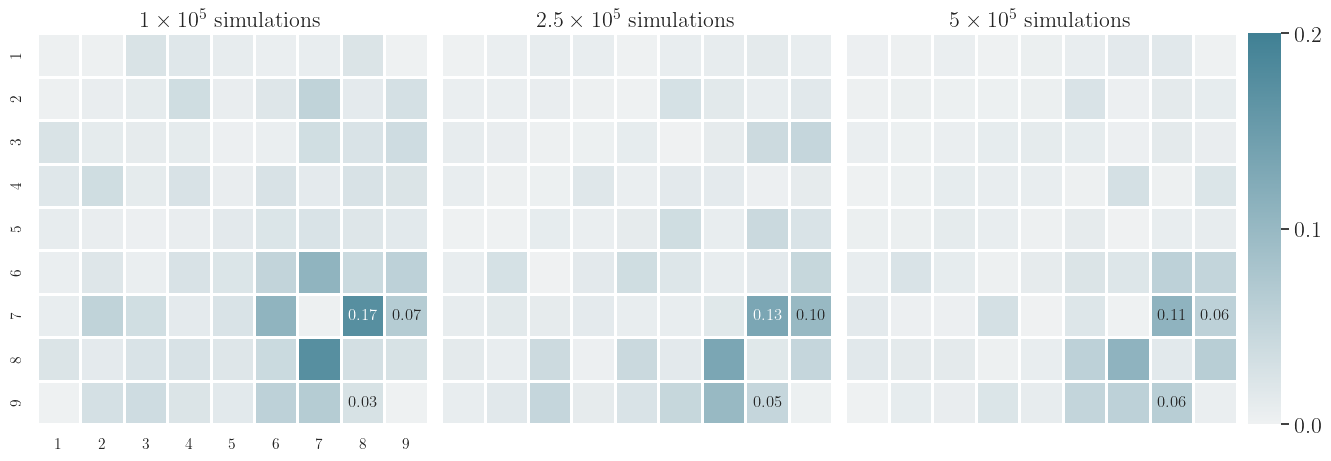

In [37]:

plt.rcParams["font.family"] = "sans"
plt.rcParams["font.size"] = 12
plt.rcParams["axes.titlesize"]=16
annotations1 = np.empty_like(relative_error_n10_1,dtype=object)
annotations1[:] = ""
annotations1[8,7] = f"{np.abs(relative_error_n10_1[7,8]):.2f}"
annotations1[6,7] = f"{np.abs(relative_error_n10_1[6,7]):.2f}"
annotations1[6,8] = f"{np.abs(relative_error_n10_1[6,8]):.2f}"
# annotations1[6,6] = f"{np.abs(relative_error_n10_1[6,6]):.2f}"  
fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4, 
                             sharey = False,
                             sharex = False,
                             figsize = (18,4.5),
                             gridspec_kw={'width_ratios':[12,12,12,1]},
                                layout='compressed') 

frequencies = [i for i in range(1,10)]
sbn.diverging_palette(250, 30, l=65, center="dark", as_cmap=True)
sbn.heatmap(
    np.abs(relative_error_n10_1),
    ax=ax1,
    linewidths=1,
    square=True,
    vmin=0,
    vmax=0.2,
    xticklabels=frequencies,
    yticklabels=frequencies,
    cbar=True,
    cbar_kws={'shrink':0.4, 'orientation':'vertical',
             'ticks':[0,0.1,0.2]},
    cbar_ax=ax4,
    annot=annotations1,
    fmt="",
    annot_kws={"fontsize":12},
    cmap=sbn.color_palette("light:#408094", as_cmap=True))


annotations1[8,7] = f"{np.abs(relative_error_n10_2[7,8]):.2f}"
annotations1[6,7] = f"{np.abs(relative_error_n10_2[6,7]):.2f}"
# annotations1[6,6] = f"{np.abs(relative_error_n10_2[6,6]):.2f}"
annotations1[6,8] = f"{np.abs(relative_error_n10_2[6,8]):.2f}"
sbn.heatmap(
    np.abs(relative_error_n10_2),
    ax=ax2,
    linewidths=1,
    square=True,
    vmin=0,
    vmax=0.2,
    xticklabels=[],
    yticklabels=[],
    cbar=False,
    annot=annotations1,
    fmt="",
    annot_kws={"fontsize":12},
    cmap=sbn.color_palette("light:#408094", as_cmap=True))


annotations1[8,7] = f"{np.abs(relative_error_n10_5[7,8]):.2f}"
annotations1[6,7] = f"{np.abs(relative_error_n10_5[6,7]):.2f}"
# annotations1[6,6] = f"{np.abs(relative_error_n10_5[6,6]):.2f}" 
annotations1[6,8] = f"{np.abs(relative_error_n10_5[6,8]):.2f}"
sbn.heatmap(
    np.abs(relative_error_n10_5),
    ax=ax3,
    linewidths=1,
    square=True,
    vmin=0,
    vmax=0.2,
    xticklabels=[],
    yticklabels=[],
    cbar=False,
    cmap=sbn.color_palette("light:#408094", as_cmap=True),
    annot=annotations1,
    fmt="",
    annot_kws={"fontsize":12,
               "family": ""})

ax1.set_title(r"$1 \times 10^5$ simulations")
ax2.set_title(r"$2.5 \times 10^5$ simulations")
ax3.set_title(r"$5 \times 10^5$ simulations")

cbar = ax1.collections[0].colorbar
cbar.ax.tick_params(labelsize=16)
# plt.suptitle("Absolute relative error of theory vs simulation")
plt.show()

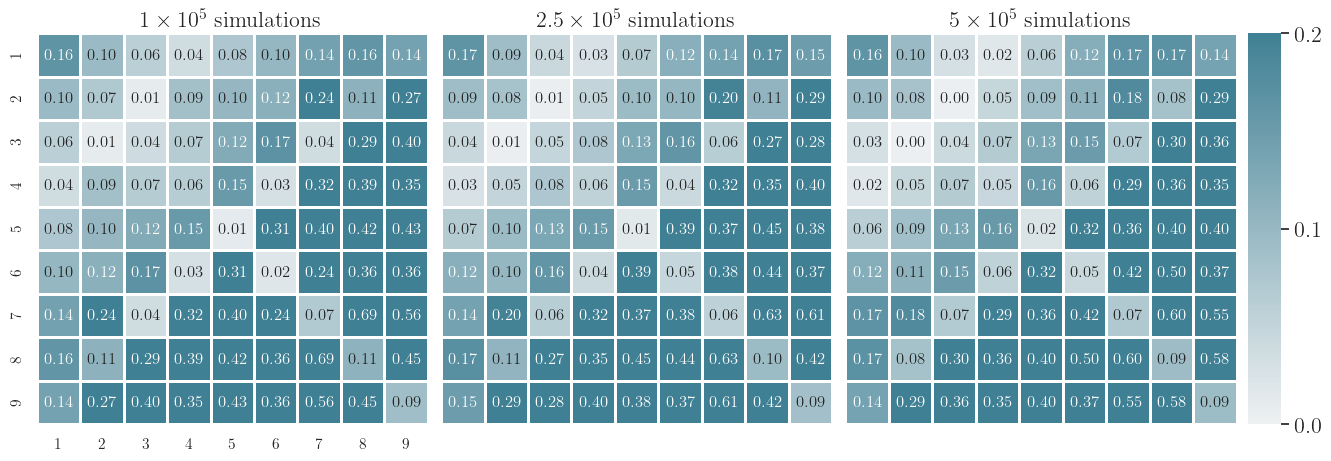

In [38]:
plt.rcParams["font.family"] = "sans"
plt.rcParams["font.size"] = 12
plt.rcParams["axes.titlesize"]=16
annotations1 = np.empty_like(relative_error_n10_1,dtype=object)
annotations1[:] = ""
annotations1[8,7] = f"{np.abs(relative_error_Griffith1[7,8]):.2f}"
annotations1[6,7] = f"{np.abs(relative_error_Griffith1[6,7]):.2f}"
annotations1[6,8] = f"{np.abs(relative_error_Griffith1[6,8]):.2f}"
# annotations1[6,6] = f"{np.abs(relative_error_n10_1[6,6]):.2f}"  
fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4, 
                             sharey = False,
                             sharex = False,
                             figsize = (18,4.5),
                             gridspec_kw={'width_ratios':[12,12,12,1]},
                                layout='compressed') 

frequencies = [i for i in range(1,10)]
sbn.diverging_palette(250, 30, l=65, center="dark", as_cmap=True)
sbn.heatmap(
    np.abs(relative_error_Griffith1),
    ax=ax1,
    linewidths=1,
    square=True,
    vmin=0,
    vmax=0.2,
    xticklabels=frequencies,
    yticklabels=frequencies,
    cbar=True,
    cbar_kws={'shrink':0.4, 'orientation':'vertical',
             'ticks':[0,0.1,0.2]},
    cbar_ax=ax4,
    annot=True,
    fmt=".2f",
    annot_kws={"fontsize":12},
    cmap=sbn.color_palette("light:#408094", as_cmap=True))


annotations1[8,7] = f"{np.abs(relative_error_Griffith2[7,8]):.2f}"
annotations1[6,7] = f"{np.abs(relative_error_Griffith2[6,7]):.2f}"
# annotations1[6,6] = f"{np.abs(relative_error_n10_2[6,6]):.2f}"
annotations1[6,8] = f"{np.abs(relative_error_Griffith2[6,8]):.2f}"
sbn.heatmap(
    np.abs(relative_error_Griffith2),
    ax=ax2,
    linewidths=1,
    square=True,
    vmin=0,
    vmax=0.2,
    xticklabels=[],
    yticklabels=[],
    cbar=False,
    annot=True,
    fmt=".2f",
    annot_kws={"fontsize":12},
    cmap=sbn.color_palette("light:#408094", as_cmap=True))


annotations1[8,7] = f"{np.abs(relative_error_Griffith3[7,8]):.2f}"
annotations1[6,7] = f"{np.abs(relative_error_Griffith3[6,7]):.2f}"
# annotations1[6,6] = f"{np.abs(relative_error_n10_5[6,6]):.2f}" 
annotations1[6,8] = f"{np.abs(relative_error_Griffith3[6,8]):.2f}"
sbn.heatmap(
    np.abs(relative_error_Griffith3),
    ax=ax3,
    linewidths=1,
    square=True,
    vmin=0,
    vmax=0.2,
    xticklabels=[],
    yticklabels=[],
    cbar=False,
    cmap=sbn.color_palette("light:#408094", as_cmap=True),
    annot=True,
    fmt=".2f",
    annot_kws={"fontsize":12,
               "family": ""})

ax1.set_title(r"$1 \times 10^5$ simulations")
ax2.set_title(r"$2.5 \times 10^5$ simulations")
ax3.set_title(r"$5 \times 10^5$ simulations")

cbar = ax1.collections[0].colorbar
cbar.ax.tick_params(labelsize=16)
# plt.suptitle("Absolute relative error of theory vs simulation")
plt.show()

In [39]:
annotations1

array([['', '', '', '', '', '', '', '', ''],
       ['', '', '', '', '', '', '', '', ''],
       ['', '', '', '', '', '', '', '', ''],
       ['', '', '', '', '', '', '', '', ''],
       ['', '', '', '', '', '', '', '', ''],
       ['', '', '', '', '', '', '', '', ''],
       ['', '', '', '', '', '', '', '0.60', '0.55'],
       ['', '', '', '', '', '', '', '', ''],
       ['', '', '', '', '', '', '', '0.58', '']], dtype=object)

In [40]:
print(np.sum(np.abs(relative_error_n10_1)),np.sum(np.abs(relative_error_n10_2)),np.sum(np.abs(relative_error_n10_5)))

2.1979952259151756 1.5997588142335237 1.2949059589098173


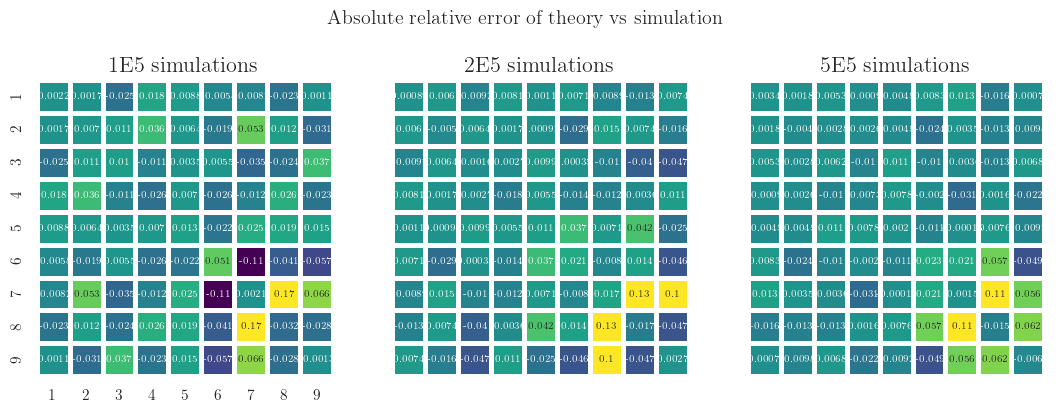

In [41]:
fix, (ax1,ax2, ax3) = plt.subplots(1,3, 
                             sharey = False,
                             sharex = False,
                             figsize = (13,4.5),
                             gridspec_kw={'width_ratios':[12,12,12]}) 

ax4 = fig.add_axes((36/37, 0.19, 1/37, 0.61))

frequencies = [i for i in range(1,10)]

sbn.heatmap(
    relative_error_n10_1,
    ax=ax1,
    linewidths=2.5,
    vmin=-0.10,
    vmax=0.10,
    square=True,
    xticklabels=frequencies,
    yticklabels=frequencies,
    cbar=True,
    cbar_kws={"shrink":0.4},
    cbar_ax=ax4,
    cmap='viridis',
    annot=True,
    annot_kws={"fontsize":7})

sbn.heatmap(
    relative_error_n10_2,
    ax=ax2,
    linewidths=2.5,
    vmin=-0.10,
    vmax=0.10,
    square=True,
    xticklabels=[],
    yticklabels=[],
    cbar=False,
    cmap='viridis',
    annot=True,
    annot_kws={"fontsize":7})

sbn.heatmap(
    relative_error_n10_5,
    ax=ax3,
    linewidths=2.5,
    vmin=-0.10,
    vmax=0.10,
    square=True,
    xticklabels=[],
    yticklabels=[],
    cbar=False,
    cmap='viridis',
    annot=True,
    annot_kws={"fontsize":7})

ax1.set_title("1E5 simulations")
ax2.set_title("2E5 simulations")
ax3.set_title("5E5 simulations")
plt.suptitle("Absolute relative error of theory vs simulation")
plt.show()

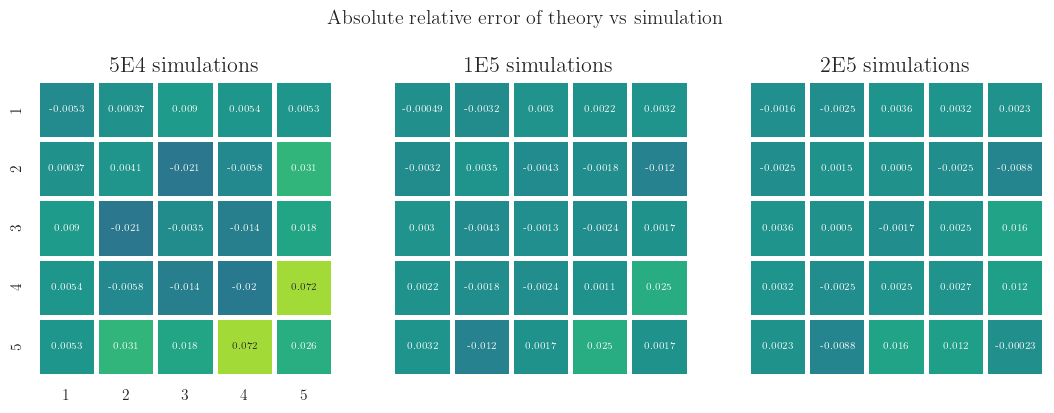

In [42]:
fix, (ax1,ax2, ax3) = plt.subplots(1,3, 
                             sharey = False,
                             sharex = False,
                             figsize = (13,4.5),
                             gridspec_kw={'width_ratios':[12,12,12]}) 

ax4 = fig.add_axes((36/37, 0.19, 1/37, 0.61))

frequencies = [i for i in range(1,6)]

sbn.heatmap(
    relative_error_n6,
    ax=ax1,
    linewidths=2.5,
    vmin=-0.10,
    vmax=0.10,
    square=True,
    xticklabels=frequencies,
    yticklabels=frequencies,
    cbar=True,
    cbar_kws={"shrink":0.4},
    cbar_ax=ax4,
    cmap='viridis',
    annot=True,
    annot_kws={"fontsize":7})

sbn.heatmap(
    relative_error_n6_,
    ax=ax2,
    linewidths=2.5,
    vmin=-0.10,
    vmax=0.10,
    square=True,
    xticklabels=[],
    yticklabels=[],
    cbar=False,
    cmap='viridis',
    annot=True,
    annot_kws={"fontsize":7})

sbn.heatmap(
    relative_error_n6_2,
    ax=ax3,
    linewidths=2.5,
    vmin=-0.10,
    vmax=0.10,
    square=True,
    xticklabels=[],
    yticklabels=[],
    cbar=False,
    cmap='viridis',
    annot=True,
    annot_kws={"fontsize":7})

ax1.set_title("5E4 simulations")
ax2.set_title("1E5 simulations")
ax3.set_title("2E5 simulations")
plt.suptitle("Absolute relative error of theory vs simulation")
plt.show()

In [43]:
with open('/home/farid/Documents/git/jfsNumerics/Mathematica/JointFreqSpectrum20',
          'rb') as f: 
    depth=np.fromfile(f, dtype=np.dtype('int32'), count=1)
    dims = np.fromfile(f,dtype=np.dtype('int32'),count=depth[0])
    jfs20=np.reshape(np.fromfile(f,dtype=np.dtype('float64'),
                                                count=reduce(lambda x,y:x*y,dims)), dims)

In [44]:
jfs20_log=np.log(jfs20)

In [45]:
print(np.max(jfs20_log), np.min(jfs20_log))

-2.2627994786732732 -9.848992432592128


<Axes: >

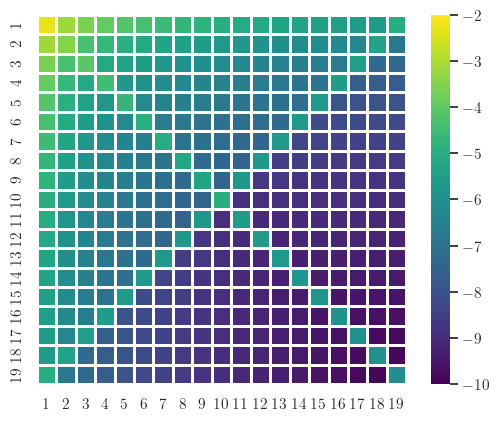

In [46]:
fig, ax = plt.subplots(1,1)
frequencies = [i for i in range(1,20)]

sbn.heatmap(
    jfs20_log,
    ax=ax,
    linewidths=1,
    vmin=-10,
    vmax=-2,
    square=True,
    xticklabels=frequencies,
    yticklabels=frequencies,
    cbar=True,
    cmap='viridis',
    )

In [47]:

# Replace 'your_file.csv' with the path to your CSV file
filename = 'JointFreqSpectrum30.csv'
filename2= 'JFS30_revised.csv'
filename3 = 'JFSn15.csv'
filename4 = 'JFS25_revised.csv'

# Load the CSV file into a NumPy array
# By default, np.loadtxt assumes the data is numerical and separated by commas
jfs30 = np.loadtxt(data_folder+filename, delimiter=',', skiprows=0)
normalisedjfs30=np.loadtxt(data_folder+filename2, delimiter=',', skiprows=0)
jfs15 = np.loadtxt(data_folder+filename3, delimiter=',', skiprows=0)
jfs25 = np.loadtxt(data_folder+filename4, delimiter=',', skiprows=0)

In [48]:
log_jfs30 = np.log(jfs30)
log_normalisedjfs30 = np.log(normalisedjfs30)

<Axes: >

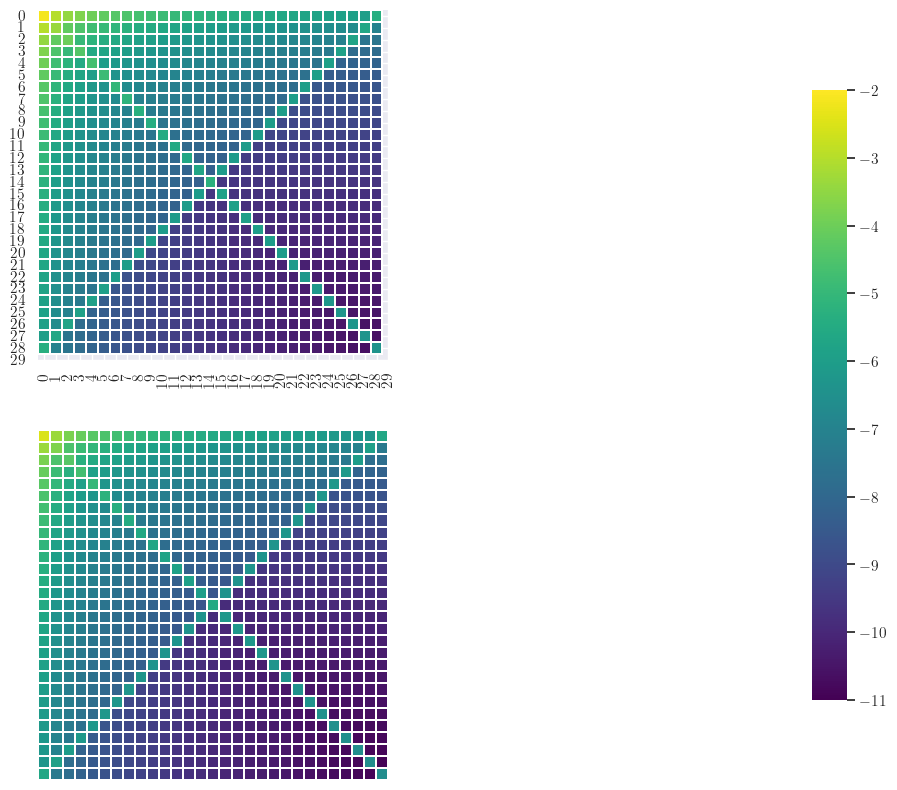

In [49]:
fig, (ax1, ax2) = plt.subplots(2,1,
                            sharey=False,
                            sharex=False,
                            figsize=(13,10))
frequencies = [i for i in range(30)]

ax3 = fig.add_axes((36/37, 0.19, 1/37, 0.61))
sbn.heatmap(
    log_jfs30,
    ax=ax1,
    linewidths=0.25,
    vmin=-11,
    vmax=-2,
    square=True,
    xticklabels=frequencies,
    yticklabels=frequencies,
    cbar=True,
    cbar_kws={"shrink":0.4},
    cbar_ax=ax3,
    cmap='viridis',
    annot=False,
    annot_kws={"fontsize":7})

sbn.heatmap(
    log_normalisedjfs30,
    ax=ax2,
    linewidths=0.25,
    vmin=-11,
    vmax=-2,
    square=True,
    xticklabels=[],
    yticklabels=[],
    cbar=False,
    cmap='viridis',
    annot=False,
    annot_kws={"fontsize":7})

In [50]:
normalised_jfs20 = jfs20/np.max(jfs20)
normalised_jfs10 = jfs10/np.max(jfs10)
normalised_normalised_jfs30 = normalisedjfs30/np.max(normalisedjfs30)

In [51]:
print([np.max(np.log(a)) for a in [normalised_jfs10, normalised_jfs20, normalised_normalised_jfs30]])
print([np.min(np.log(a)) for a in [normalised_jfs10, normalised_jfs20, normalised_normalised_jfs30]])

[np.float64(0.0), np.float64(0.0), np.float64(0.0)]
[np.float64(-6.0629363856332175), np.float64(-7.586192953918855), np.float64(-8.400733265164563)]


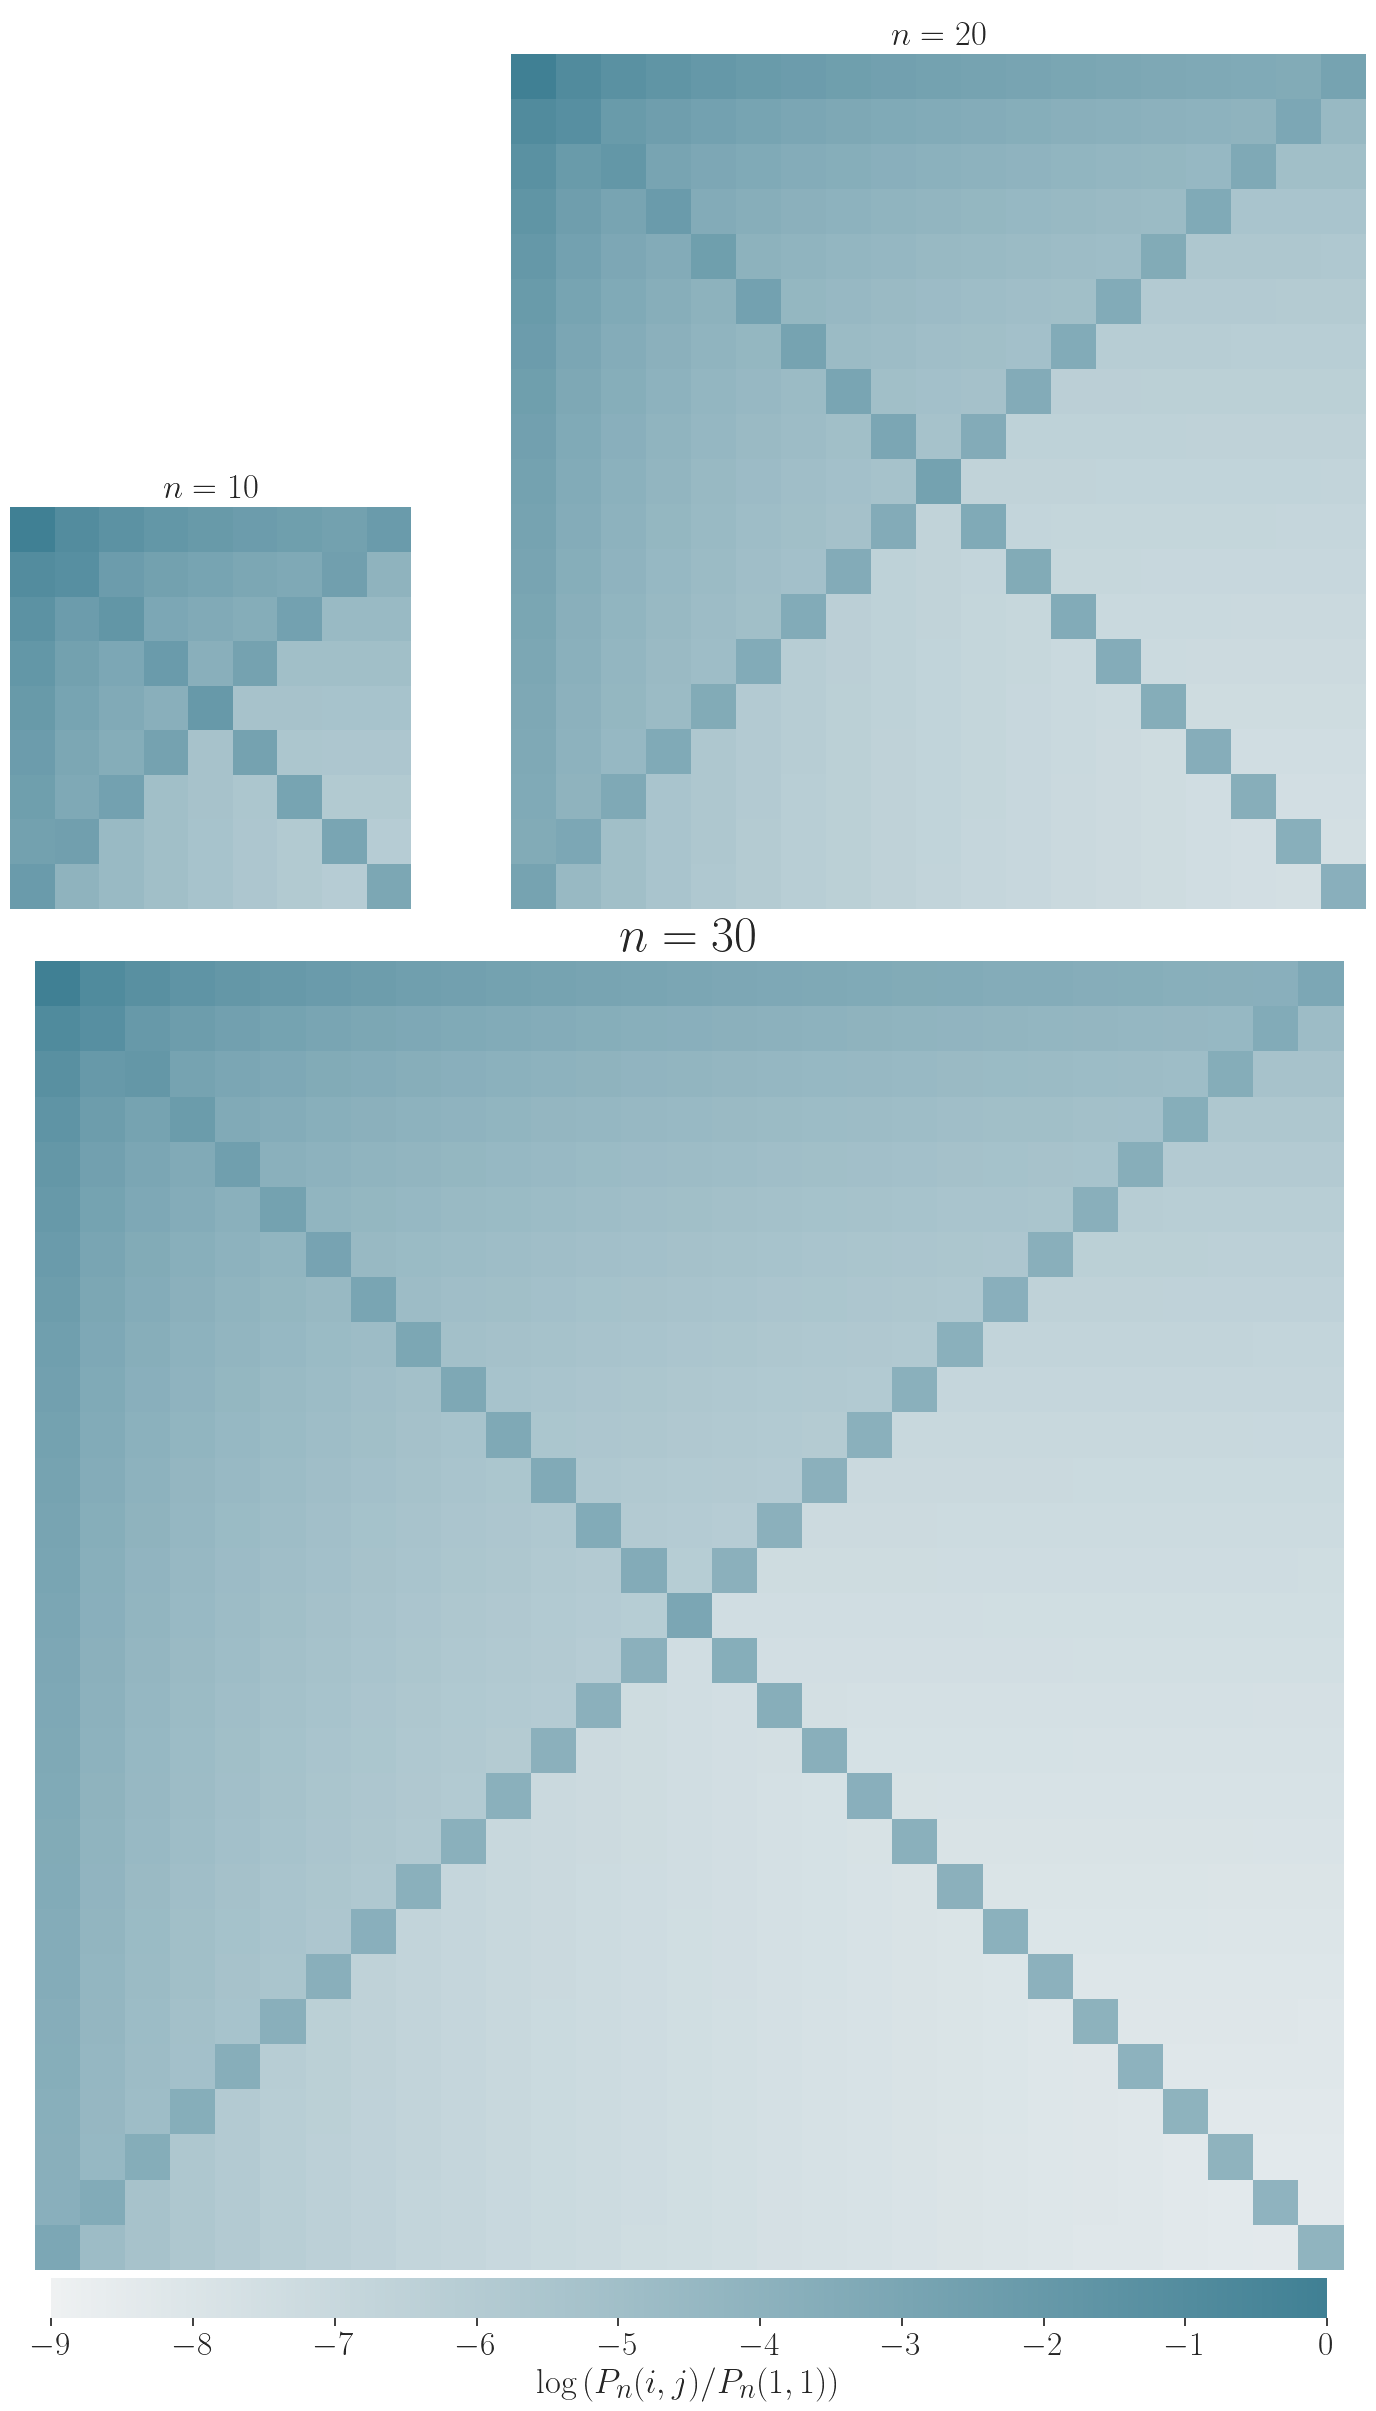

In [52]:
from matplotlib.gridspec import GridSpec


# plt.rcParams.update({"text.usetex":True, 
#                     "font.family": "sans-serif",
#                     "font.sans-serif": "DejaVu Sans",})

# data_10x10 = np.random.rand(10, 10)
# data_20x20 = np.random.rand(20, 20)
# data_30x30 = np.random.rand(30, 30)
# Create a figure with a GridSpec layout
fig = plt.figure(figsize=(24*3/5, 24),layout='constrained')
gs = GridSpec(6, 4, figure=fig, width_ratios=[1,1,2,2], height_ratios=[1]*5+[0.1])

plt.rcParams['axes.titlesize']=36

# Top-left heatmap (10x10)
ax0 = fig.add_subplot(gs[5,:])
ax1 = fig.add_subplot(gs[1, 0:2])
sbn.heatmap(np.log(normalised_jfs10), ax=ax1,
            cmap=sbn.color_palette("light:#408094", as_cmap=True),
            vmax=0,
            vmin=-9,
            cbar=False,
            square=True,
            xticklabels=[],
            yticklabels=[])
ax1.tick_params(left=False, bottom=False)
ax1.set_title(r'\Huge $n=10$')

# Top-right larger heatmap (20x20)
ax2 = fig.add_subplot(gs[0:2, 2:])
sbn.heatmap(np.log(normalised_jfs20), ax=ax2, 
            cmap=sbn.color_palette("light:#408094", as_cmap=True), 
            cbar=False, 
            square=True, 
            vmin=-9, 
            vmax=0,
           xticklabels=[],
           yticklabels=[])
ax2.tick_params(left=False, bottom=False)
ax2.set_title(r'\Huge $n=20$')

# Bottom heatmap (30x30) spanning the width of the top two
ax3 = fig.add_subplot(gs[2:5, 0:])
sbn.heatmap(np.log(normalised_normalised_jfs30),
            ax=ax3,
            cmap=sbn.color_palette("light:#408094", as_cmap=True),
            square=True,
            cbar=True, 
            cbar_ax=ax0,
            cbar_kws={'orientation':'horizontal',
                      "label":r"\Huge$\log \left(P_n(i,j)/P_n(1,1)\right)$"},
            vmax=0,
            vmin=-9,
           xticklabels=[],
           yticklabels=[])
ax3.set_title(r'$n=30$')
ax0.tick_params(labelsize=24)
ax0.set_aspect(0.283)
# ax3.tick_params(left=False, bottom=False)
# sbn.dark_palette("seagreen", as_cmap=True)
# sbn.set()
# Adjust layout and display the plot
plt.show()

In [53]:
filename3="CSFS_x2_BN.csv"
CSFS_x2_BN = np.loadtxt(data_folder+filename3, delimiter=',',skiprows=0)

In [54]:
print((CSFS_x2_BN - jfs10)/jfs10)

[[ 0.1739  0.1501  0.0854  0.0307 -0.0130 -0.0460 -0.0689 -0.0827 -0.1242]
 [ 0.1501  0.0016  0.0176 -0.0359 -0.0782 -0.1095 -0.1310 -0.1613 -0.0750]
 [ 0.0854  0.0176 -0.1090 -0.0985 -0.1388 -0.1683 -0.1799 -0.1088 -0.1079]
 [ 0.0307 -0.0359 -0.0985 -0.1721 -0.1929 -0.1898 -0.1414 -0.1440 -0.1429]
 [-0.0130 -0.0782 -0.1388 -0.1929 -0.1955 -0.1707 -0.1771 -0.1793 -0.1781]
 [-0.0460 -0.1095 -0.1683 -0.1898 -0.1707 -0.2037 -0.2113 -0.2133 -0.2120]
 [-0.0689 -0.1310 -0.1799 -0.1414 -0.1771 -0.2113 -0.2045 -0.2451 -0.2436]
 [-0.0827 -0.1613 -0.1088 -0.1440 -0.1793 -0.2133 -0.2451 -0.1987 -0.2726]
 [-0.1242 -0.0750 -0.1079 -0.1429 -0.1781 -0.2120 -0.2436 -0.2726 -0.1879]]


In [55]:
CSFS_x2_BN.shape

(9, 9)

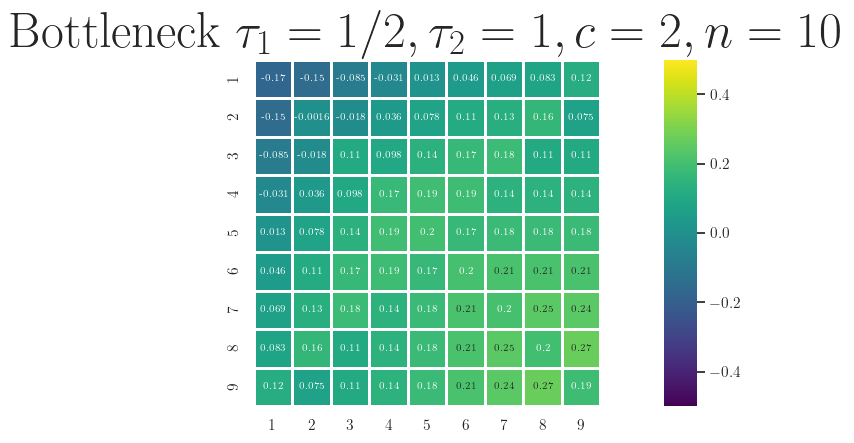

In [56]:
fix, (ax1,ax2) = plt.subplots(1,2, 
                             sharey = False,
                             sharex = False,
                             figsize = (6,4.5),
                             gridspec_kw={'width_ratios':[12,1]}) 

frequencies = [i for i in range(1,10)]
sbn.heatmap(
    (jfs10-CSFS_x2_BN)/jfs10,
    ax=ax1,
    linewidths=1,
    vmin=-0.5,
    vmax=0.5,
    square=True,
    xticklabels=frequencies,
    yticklabels=frequencies,
    cbar=True,
    cbar_kws={'shrink':0.4},
    cbar_ax=ax2,
    cmap='viridis',
    annot=True,
    annot_kws={"fontsize":7})

ax1.set_title(r"Bottleneck $\tau_1 = 1/2, \tau_2 = 1, c=2, n = 10$")
plt.show()

### this is the CSFS when the population is is halved at t = 1/2, 
### then returns to its initial level when t = 1 (i.e. a bottleneck).

In [57]:
filenames = ["JFSBottleNeck" + str(x) + ".csv" for x in range(1,8)]

jfs_arrs = []
for file in filenames:
    jfs_arrs.append(np.loadtxt(data_folder+file, delimiter=',',skiprows=1))


firstset = [(1/2, 1, c, 1) for c in [2,5,10]]
secondset = [(1, 2, c, 1) for c in [2,5,10]]
keyset = firstset+secondset+[(0,0.02,10,1)]

jfsDict = {}
i=0
for params in keyset: 
    jfsDict[params] = jfs_arrs[i]
    i+=1


In [58]:
jfsDict[(0,0.02,10,1)].shape

(9, 9)

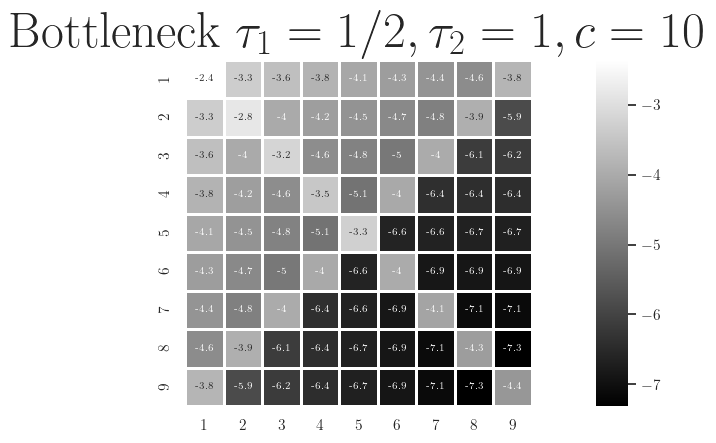

In [59]:
fix, (ax1,ax2) = plt.subplots(1,2, 
                             sharey = False,
                             sharex = False,
                             figsize = (6,4.5),
                             gridspec_kw={'width_ratios':[12,1]}) 

frequencies = [i for i in range(1,10)]
sbn.heatmap(
    np.log(jfsDict[(0,0.02,10,1)]),
    ax=ax1,
    linewidths=1,
    square=True,
    xticklabels=frequencies,
    yticklabels=frequencies,
    cbar=True,
    cbar_kws={'shrink':0.4},
    cbar_ax=ax2,
    cmap='gray',
    annot=True,
    annot_kws={"fontsize":7})

ax1.set_title(r"Bottleneck $\tau_1 = 1/2, \tau_2 = 1, c=10$")
plt.show()

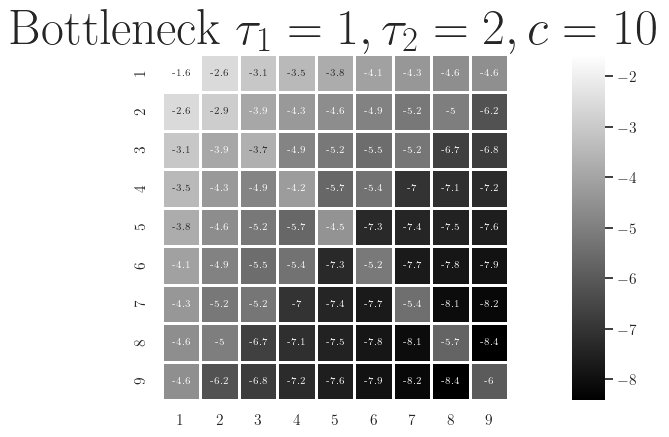

In [60]:
fix, (ax1,ax2) = plt.subplots(1,2, 
                             sharey = False,
                             sharex = False,
                             figsize = (6,4.5),
                             gridspec_kw={'width_ratios':[12,1]}) 

frequencies = [i for i in range(1,10)]
sbn.heatmap(
    np.log(jfsDict[(1,2,10,1)]),
    ax=ax1,
    linewidths=1,
    square=True,
    xticklabels=frequencies,
    yticklabels=frequencies,
    cbar=True,
    cbar_kws={'shrink':0.4},
    cbar_ax=ax2,
    cmap='gray',
    annot=True,
    annot_kws={"fontsize":7})

ax1.set_title(r"Bottleneck $\tau_1 = 1, \tau_2 = 2, c=10$")
plt.show()

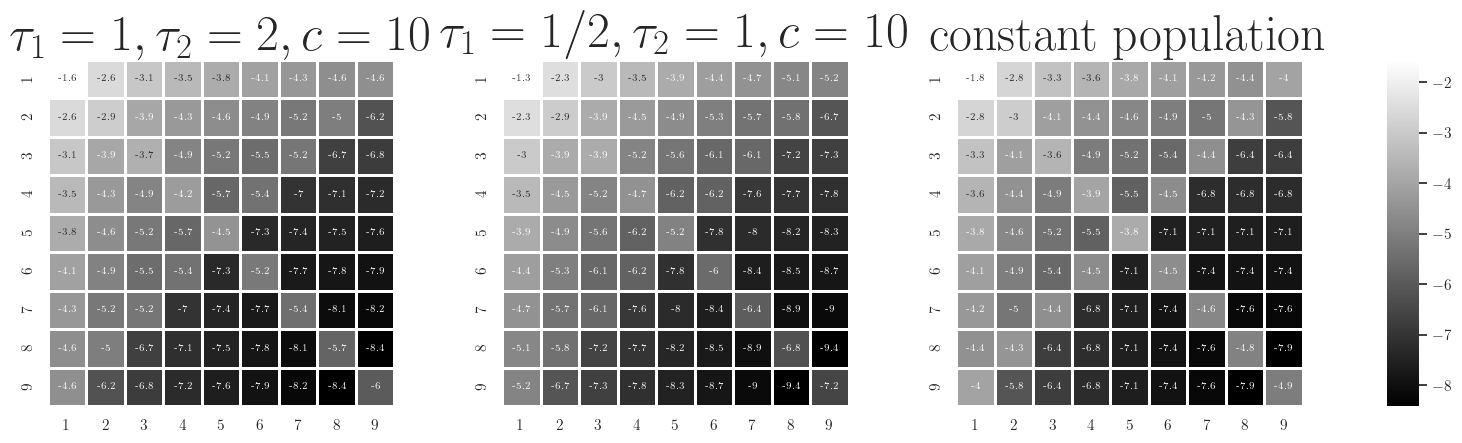

In [61]:
fix, (ax1,ax2,ax3,ax4) = plt.subplots(1,4, 
                             sharey = False,
                             sharex = False,
                             figsize = (18,4.5),
                             gridspec_kw={'width_ratios':[12,12,12,1]}) 

frequencies = [i for i in range(1,10)]
sbn.heatmap(
    np.log(jfsDict[(1,2,10,1)]),
    ax=ax1,
    linewidths=1,
    square=True,
    xticklabels=frequencies,
    yticklabels=frequencies,
    cbar=True,
    cbar_kws={'shrink':0.4},
    cbar_ax=ax4,
    cmap='gray',
    annot=True,
    annot_kws={"fontsize":7})

sbn.heatmap(
    np.log(jfsDict[(0.5,1,10,1)]),
    ax=ax2,
    linewidths=1,
    square=True,
    xticklabels=frequencies,
    yticklabels=frequencies,
    cbar=False,
    cmap='gray',
    annot=True,
    annot_kws={"fontsize":7})

sbn.heatmap(
    np.log(jfs10),
    ax=ax3,
    linewidths=1,
    square=True,
    xticklabels=frequencies,
    yticklabels=frequencies,
    cbar=False,
    cmap='gray',
    annot=True,
    annot_kws={"fontsize":7})

ax1.set_title(r"$\tau_1 = 1, \tau_2 = 2, c=10$")
ax2.set_title(r"$\tau_1 = 1/2, \tau_2 = 1, c=10$")
ax3.set_title(r"constant population")
plt.show()

In [62]:
#I want to calculate the mutual information between the frequencies b1 and b2
jfs10_marginal = np.sum(jfs10, axis=0)
jfs10_indep = np.outer(jfs10_marginal, jfs10_marginal)

jfs15_marginal = np.sum(jfs15, axis=0)
jfs15_indep = np.outer(jfs15_marginal, jfs15_marginal)

jfs20_marginal = np.sum(jfs20, axis=0)
jfs20_indep = np.outer(jfs20_marginal, jfs20_marginal)

jfs25_marginal = np.sum(jfs25, axis=0)
jfs25_indep = np.outer(jfs25_marginal, jfs25_marginal)

jfs30_marginal = np.sum(normalisedjfs30, axis=0)
jfs30_indep = np.outer(jfs30_marginal, jfs30_marginal)


marginal_entropy_n10 = -np.sum(jfs10_marginal*np.log(jfs10_marginal))
marginal_entropy_n20 = -np.sum(jfs20_marginal*np.log(jfs20_marginal))
marginal_entropy_n30 = -np.sum(jfs30_marginal*np.log(jfs30_marginal))
marginal_entropy_n15 = -np.sum(jfs15_marginal*np.log(jfs15_marginal))
marginal_entropy_n25 = -np.sum(jfs25_marginal*np.log(jfs25_marginal))



mutual_information_n10 = -np.sum(jfs10* np.log(jfs10_indep/jfs10))
mutual_information_n20 = -np.sum(jfs20* np.log(jfs20_indep/jfs20))
mutual_information_n30 = -np.sum(normalisedjfs30* np.log(jfs30_indep/normalisedjfs30))
mutual_information_n15 = -np.sum(jfs15* np.log(jfs15_indep/jfs15))
mutual_information_n25 = -np.sum(jfs25* np.log(jfs25_indep/jfs25))


print(f"H_10 ={marginal_entropy_n10}, I_10 = {mutual_information_n10}, \
I/H = {mutual_information_n10/marginal_entropy_n10}")
print(f"H_15 ={marginal_entropy_n15}, I_15 = {mutual_information_n15},\
I/H = {mutual_information_n15/marginal_entropy_n15}")
print(f"H_20 ={marginal_entropy_n20}, I_20 = {mutual_information_n20}, \
I/H = {mutual_information_n20/marginal_entropy_n20}")
print(f"H_25 ={marginal_entropy_n25}, I_25 = {mutual_information_n25},\
I/H = {mutual_information_n25/marginal_entropy_n25}")
print(f"H_30 ={marginal_entropy_n30}, I_30 = {mutual_information_n30},\
I/H = {mutual_information_n30/marginal_entropy_n30}")


H_10 =1.8592407108465836, I_10 = 0.12292234949761036, I/H = 0.0661142738433471
H_15 =2.2004816174421116, I_15 = 0.1276691305295534,I/H = 0.0580187216823737
H_20 =2.43077440119297, I_20 = 0.13960806452244198, I/H = 0.05743357526470801
H_25 =2.6071752252767824, I_25 = 0.14268584779981391,I/H = 0.05472813887477246
H_30 =2.7462363713793314, I_30 = 0.14875657033014475,I/H = 0.05416743142740838


In [63]:
np.sum(jfs30)

np.float64(1.396500590110019)

In [64]:
(jfs10-jfs10_indep)/jfs10

array([[ 0.1457, -0.1229, -0.1430, -0.1610, -0.1774, -0.1925, -0.2065,
        -0.2196,  0.3084],
       [-0.1229,  0.3506, -0.2360, -0.2443, -0.2530, -0.2619, -0.2706,
         0.4733, -1.1249],
       [-0.1430, -0.2360,  0.5140, -0.3356, -0.3355, -0.3372,  0.5458,
        -1.6743, -1.3862],
       [-0.1610, -0.2443, -0.3356,  0.6265, -0.4271,  0.5763, -2.3595,
        -1.9468, -1.6265],
       [-0.1774, -0.2530, -0.3355, -0.4271,  0.8038, -3.2606, -2.6557,
        -2.2035, -1.8528],
       [-0.1925, -0.2619, -0.3372,  0.5763, -3.2606,  0.7321, -2.9388,
        -2.4488, -2.0690],
       [-0.2065, -0.2706,  0.5458, -2.3595, -2.6557, -2.9388,  0.7824,
        -2.6854, -2.2775],
       [-0.2196,  0.4733, -1.6743, -1.9468, -2.2035, -2.4488, -2.6854,
         0.8180, -2.4799],
       [ 0.3084, -1.1249, -1.3862, -1.6265, -1.8528, -2.0690, -2.2775,
        -2.4799,  0.8445]])

In [65]:
jfs10

array([[ 0.1670,  0.0608,  0.0385,  0.0277,  0.0213,  0.0172,  0.0143,
         0.0122,  0.0188],
       [ 0.0608,  0.0503,  0.0170,  0.0123,  0.0096,  0.0078,  0.0065,
         0.0135,  0.0029],
       [ 0.0385,  0.0170,  0.0279,  0.0074,  0.0058,  0.0047,  0.0117,
         0.0017,  0.0017],
       [ 0.0277,  0.0123,  0.0074,  0.0193,  0.0040,  0.0109,  0.0012,
         0.0011,  0.0011],
       [ 0.0213,  0.0096,  0.0058,  0.0040,  0.0225,  0.0008,  0.0008,
         0.0008,  0.0008],
       [ 0.0172,  0.0078,  0.0047,  0.0109,  0.0008,  0.0110,  0.0006,
         0.0006,  0.0006],
       [ 0.0143,  0.0065,  0.0117,  0.0012,  0.0008,  0.0006,  0.0096,
         0.0005,  0.0005],
       [ 0.0122,  0.0135,  0.0017,  0.0011,  0.0008,  0.0006,  0.0005,
         0.0085,  0.0004],
       [ 0.0188,  0.0029,  0.0017,  0.0011,  0.0008,  0.0006,  0.0005,
         0.0004,  0.0076]])

In [66]:
jfsDict.keys()

dict_keys([(0.5, 1, 2, 1), (0.5, 1, 5, 1), (0.5, 1, 10, 1), (1, 2, 2, 1), (1, 2, 5, 1), (1, 2, 10, 1), (0, 0.02, 10, 1)])

In [67]:
print(np.min(jfsDict[(1,2,10,1)]/jfs10),
          np.min(jfsDict[(0.5,1,10,1)]/jfs10), np.min(jfsDict[(0,0.02,10,1)]/jfs10))
print(np.max(jfsDict[(1,2,10,1)]/jfs10),
          np.max(jfsDict[(0.5,1,10,1)]/jfs10), np.max(jfsDict[(0,0.02,10,1)]/jfs10))


0.33322063630439236 0.10225370465411894 0.5677198004634243
1.2751823494861632 1.6952465361472606 1.7134679285719405


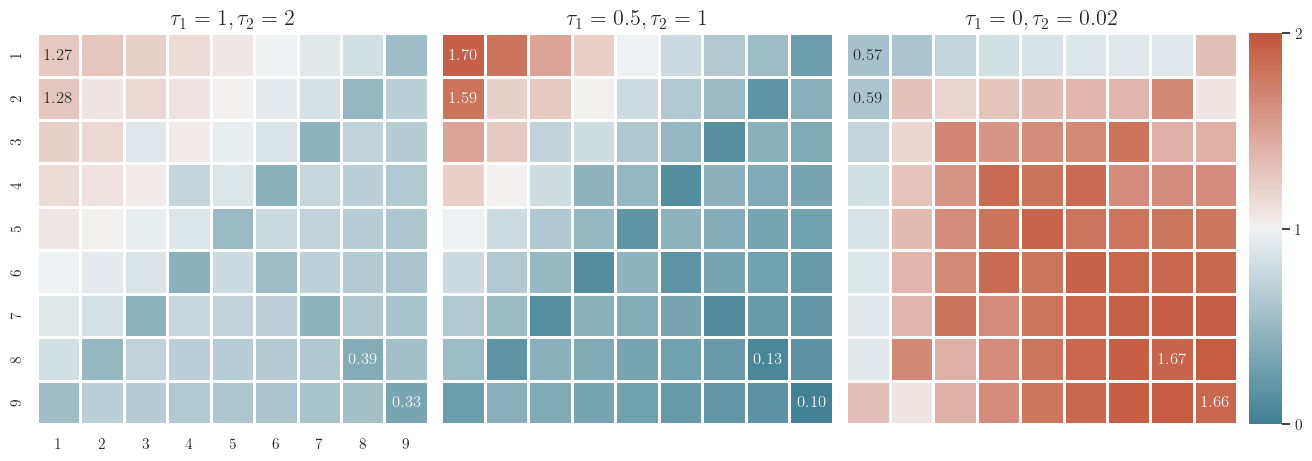

In [68]:
fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4, 
                             sharey = False,
                             sharex = False,
                             figsize = (18,4.5),
                             gridspec_kw={'width_ratios':[12,12,12,1]},
                                layout='compressed') 

frequencies = [i for i in range(1,10)]
sbn.diverging_palette(250, 30, l=65, center="dark", as_cmap=True)

plt.rcParams['axes.labelsize']=12
plt.rcParams['font.size']=14
plt.rcParams['axes.titlesize']=16
plot1 = jfsDict[(1,2,10,1)]/jfs10
plot2 = jfsDict[(0.5,1,10,1)]/jfs10
plot3 = jfsDict[(0,0.02,10,1)]/jfs10



annotations1= np.empty_like(jfs10, dtype=object)
annotations2= np.empty_like(jfs10, dtype=object)
annotations3= np.empty_like(jfs10, dtype=object)

for annotations, plot in zip([annotations1, annotations2, annotations3], [plot1, plot2, plot3]): 
    annotations[:]=""
    annotations[0,0] = f"{plot[0,0]:.2f}"
    annotations[1,0] = f"{plot[1,0]:.2f}"
    annotations[7,7] = f"{plot[7,7]:.2f}"
    annotations[8,8] = f"{plot[8,8]:.2f}"

sbn.heatmap(
    jfsDict[(1,2,10,1)]/jfs10,
    ax=ax1,
    linewidths=1,
    square=True,
    vmin=0,
    vmax=2,
    xticklabels=frequencies,
    yticklabels=frequencies,
    cbar=True,
    cbar_kws={'shrink':0.4, 'orientation':'vertical',
             'ticks':[0,1,2]},
    cbar_ax=ax4,
    annot=annotations1,
    fmt="",
    annot_kws={"fontsize":12},
    cmap=sbn.diverging_palette(220, 20, as_cmap=True))

sbn.heatmap(
    jfsDict[(0.5,1,10,1)]/jfs10,
    ax=ax2,
    linewidths=1,
    square=True,
    vmin=0.08,
    vmax=1.75,
    xticklabels=[],
    yticklabels=[],
    cbar=False,
    annot=annotations2,
    fmt="",
    annot_kws={"fontsize":12},
    cmap=sbn.diverging_palette(220, 20, as_cmap=True))

sbn.heatmap(
    jfsDict[(0,0.02,10,1)]/jfs10,
    ax=ax3,
    linewidths=1,
    square=True,
    vmin=0.08,
    vmax=1.75,
    xticklabels=[],
    yticklabels=[],
    cbar=False,
    cmap=sbn.diverging_palette(220, 20, as_cmap=True),
    annot=annotations3,
    fmt="",
    annot_kws={"fontsize":12})

ax1.set_title(r"$\tau_1 = 1, \tau_2 = 2$")
ax2.set_title(r"$\tau_1 = 0.5, \tau_2 = 1$")
ax3.set_title(r"$\tau_1 = 0, \tau_2 = 0.02$")
plt.show()

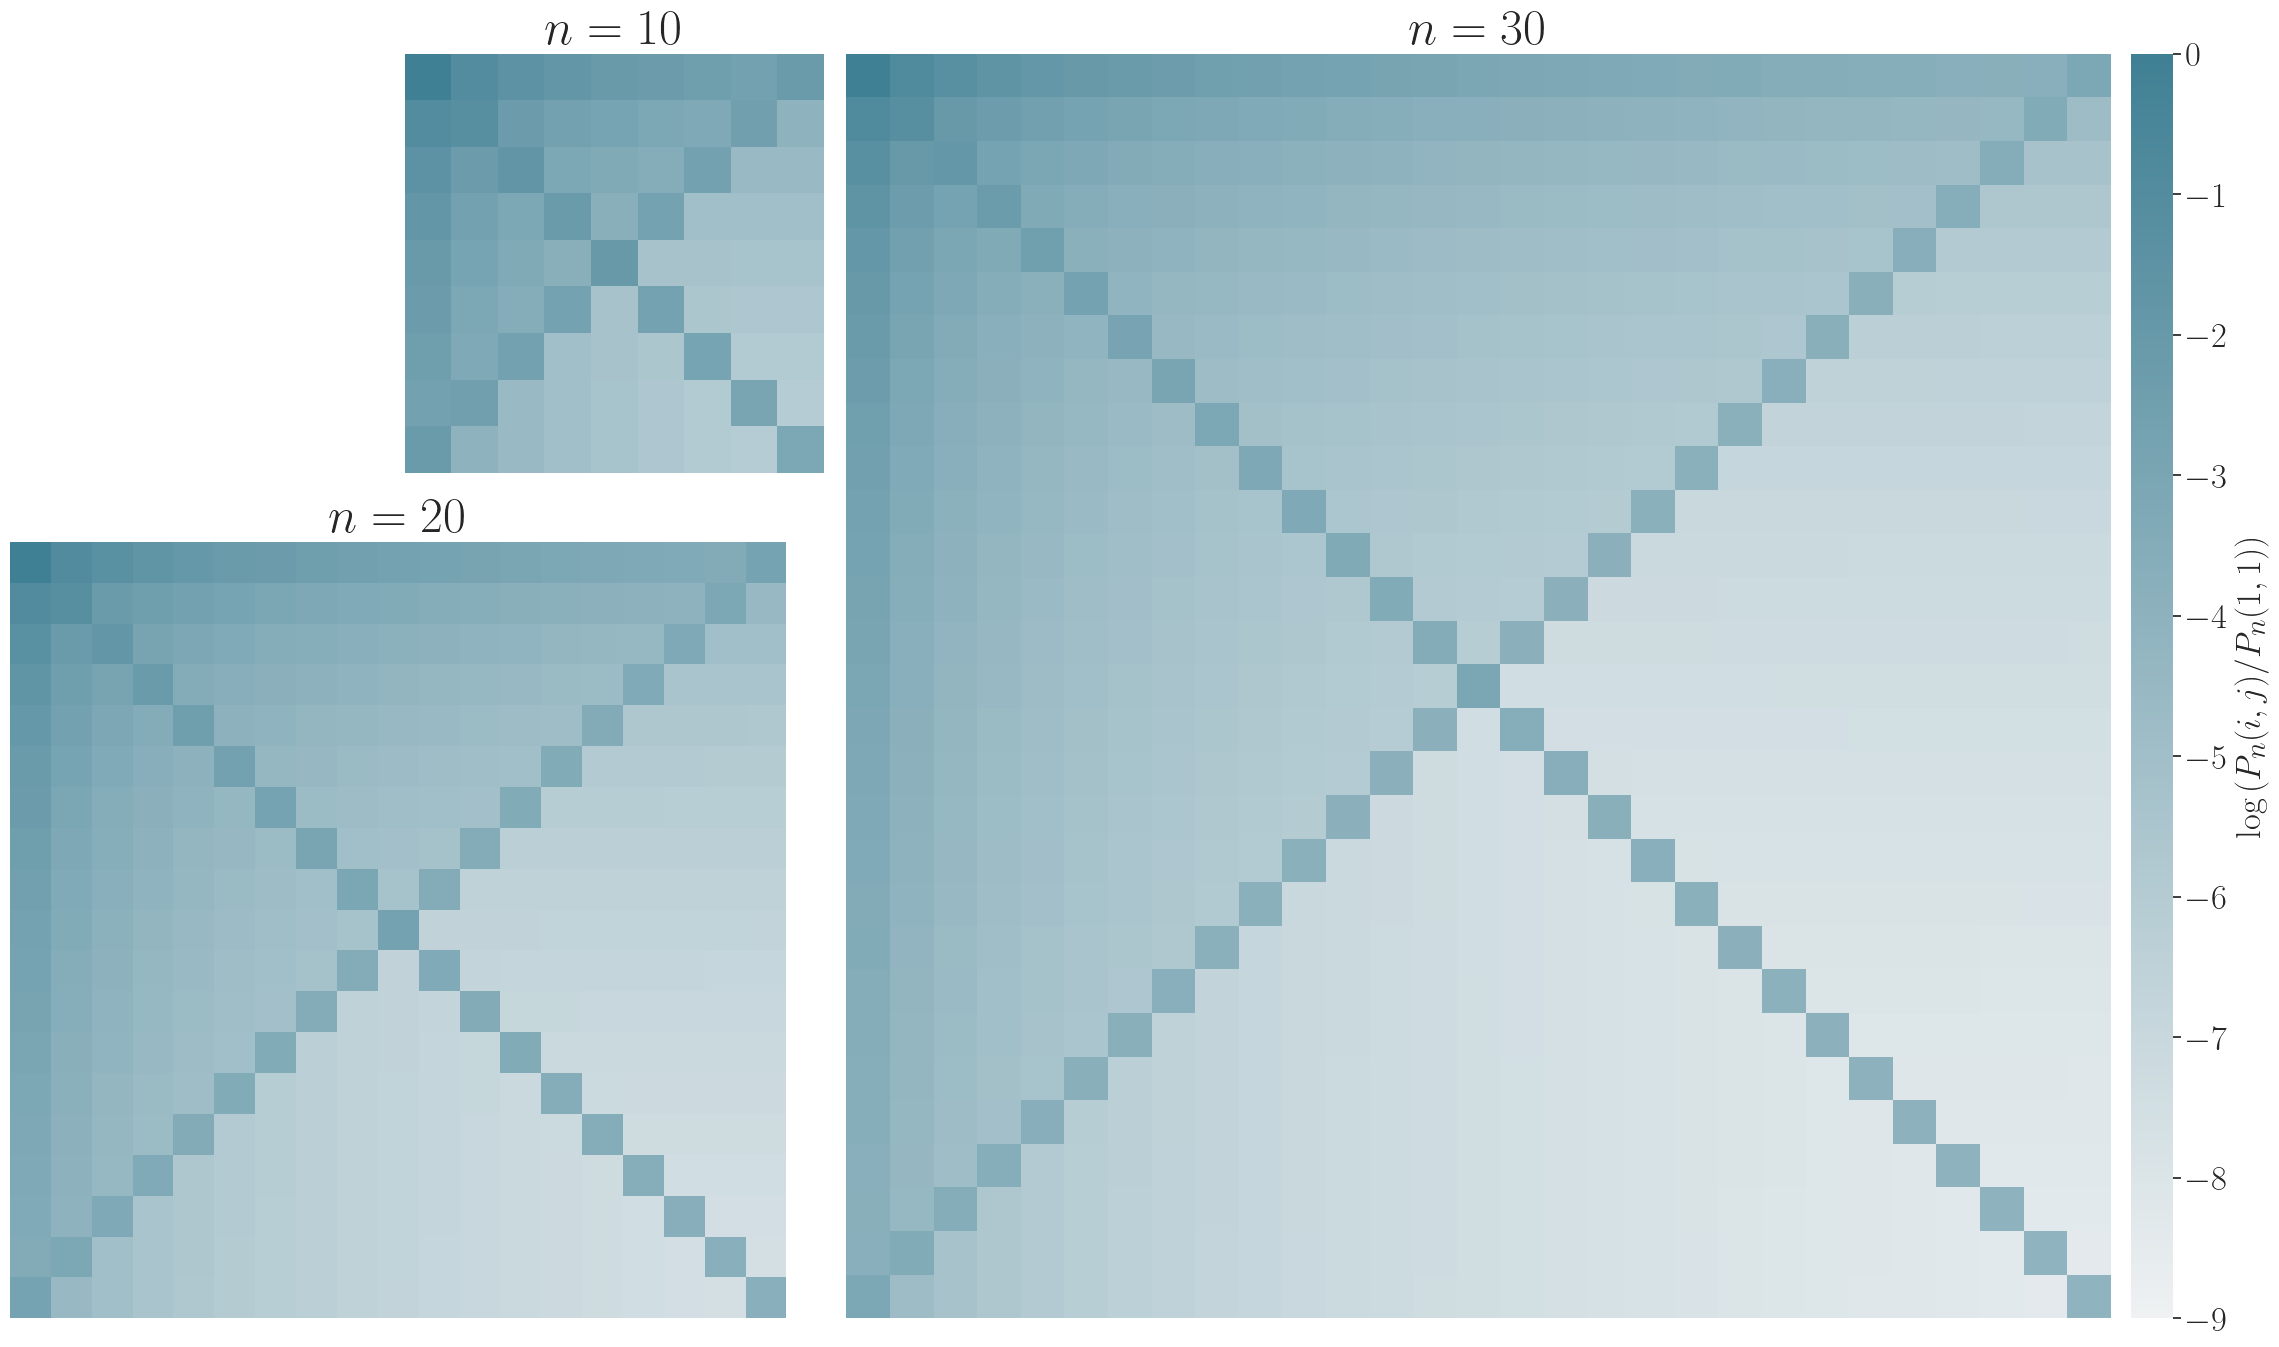

In [69]:
from matplotlib.gridspec import GridSpec

plt.rcParams["axes.titlesize"] = 36
fig = plt.figure(figsize=(24, 24*3/5),layout='compressed')
gs = GridSpec(4, 6, figure=fig, height_ratios=[1,1,2,2], width_ratios=[1]*5+[0.1])


# Top-left heatmap (10x10)
ax0 = fig.add_subplot(gs[:,5:])
ax1 = fig.add_subplot(gs[0:2, 1])
sbn.heatmap(np.log(normalised_jfs10), ax=ax1,
            cmap=sbn.color_palette("light:#408094", as_cmap=True),
            vmax=0,
            vmin=-9,
            cbar=False,
            square=True,
            xticklabels=[],
            yticklabels=[])
ax1.tick_params(left=False, bottom=False)
ax1.set_title(r'$n=10$')

# Top-right larger heatmap (20x20)
ax2 = fig.add_subplot(gs[2:, 0:2])
sbn.heatmap(np.log(normalised_jfs20), ax=ax2, 
            cmap=sbn.color_palette("light:#408094", as_cmap=True), 
            cbar=False, 
            square=True, 
            vmin=-9, 
            vmax=0,
           xticklabels=[],
           yticklabels=[])
ax2.tick_params(left=False, bottom=False) 
ax2.set_title(r'$n=20$')

# Bottom heatmap (30x30) spanning the width of the top two
ax3 = fig.add_subplot(gs[0:, 2:5])
sbn.heatmap(np.log(normalised_normalised_jfs30),
            ax=ax3,
            cmap=sbn.color_palette("light:#408094", as_cmap=True),
            square=True,
            cbar=True, 
            cbar_ax=ax0,
            cbar_kws={'orientation':'vertical',
                      "label":r"\Huge$\log \left(P_n(i,j)/P_n(1,1)\right)$"},
            vmax=0,
            vmin=-9,
           xticklabels=[],
           yticklabels=[])
ax3.set_title(r'$n=30$')
ax0.tick_params(labelsize=25)

# ax0.set_aspect(0.283)

plt.show()

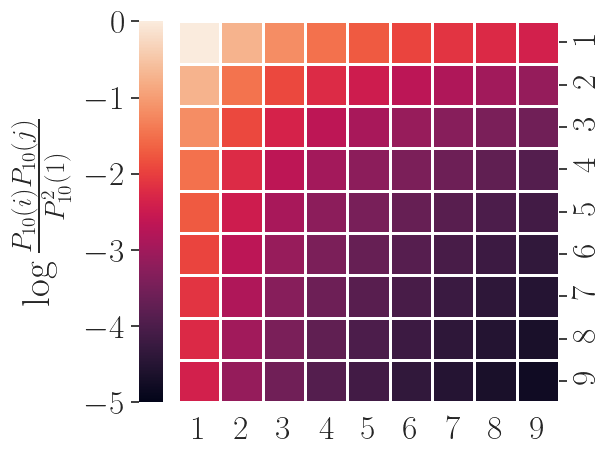

In [170]:
fig, (cbar_ax, ax1) = plt.subplots(
    1, 2, 
    sharey=False, 
    sharex=False, 
    figsize=(6, 4.5),
    gridspec_kw={'width_ratios': [0.75, 12], 'wspace': 0.05},
    layout="compressed"
)

frequencies = [i for i in range(1, 10)]
sbn.heatmap(
    np.log(jfs10_indep / jfs10_indep[0, 0]),
    ax=ax1,
    linewidths=1,
    vmin=-5,
    vmax=0,
    square=True,
    cbar=True,
    cbar_ax=cbar_ax,
    cmap='rocket',
    annot=False,
)

ax1.yaxis.tick_right()
cbar_ax.yaxis.set_label_position("left")
cbar_ax.yaxis.tick_left()
cbar_ax.set_ylabel(r"$\log \frac{P_{10}(i)P_{10}(j)}{P_{10}^2(1)}$", rotation=90, labelpad=10, fontsize=28)
cbar_ax.tick_params(labelsize=24)

ax1.set_xticklabels(frequencies, fontsize=24)
ax1.set_yticklabels(frequencies, fontsize=24)
plt.show()


In [70]:
marginal_dict = {} 
for key in jfsDict.keys():
    dist = jfsDict[key]
    marginal_dist = np.array([sum(dist[i, :]) for i in range(dist.shape[0])])
    marginal_dict[key] = marginal_dist


In [142]:
jfs10_indep/jfs10_indep[0,0]


array([[ 1.0000,  0.4783,  0.3084,  0.2250,  0.1759,  0.1436,  0.1209,
         0.1041,  0.0911],
       [ 0.4783,  0.2288,  0.1475,  0.1076,  0.0841,  0.0687,  0.0578,
         0.0498,  0.0436],
       [ 0.3084,  0.1475,  0.0951,  0.0694,  0.0542,  0.0443,  0.0373,
         0.0321,  0.0281],
       [ 0.2250,  0.1076,  0.0694,  0.0506,  0.0396,  0.0323,  0.0272,
         0.0234,  0.0205],
       [ 0.1759,  0.0841,  0.0542,  0.0396,  0.0309,  0.0253,  0.0213,
         0.0183,  0.0160],
       [ 0.1436,  0.0687,  0.0443,  0.0323,  0.0253,  0.0206,  0.0174,
         0.0149,  0.0131],
       [ 0.1209,  0.0578,  0.0373,  0.0272,  0.0213,  0.0174,  0.0146,
         0.0126,  0.0110],
       [ 0.1041,  0.0498,  0.0321,  0.0234,  0.0183,  0.0149,  0.0126,
         0.0108,  0.0095],
       [ 0.0911,  0.0436,  0.0281,  0.0205,  0.0160,  0.0131,  0.0110,
         0.0095,  0.0083]])

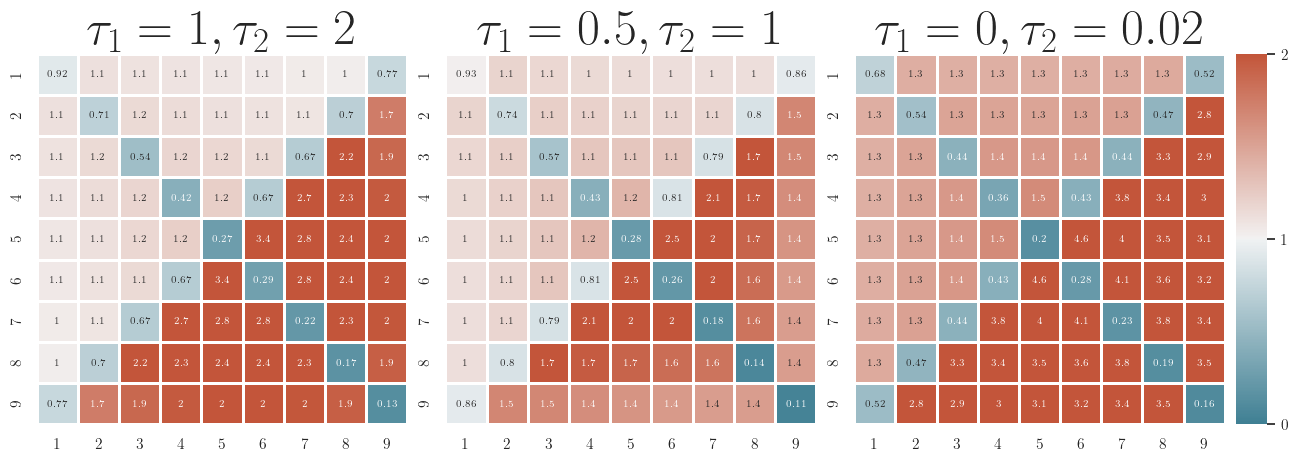

In [72]:
fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4, 
                             sharey = False,
                             sharex = False,
                             figsize = (18,4.5),
                             gridspec_kw={'width_ratios':[12,12,12,1]},
                                layout='compressed') 

frequencies = [i for i in range(1,10)]
sbn.diverging_palette(250, 30, l=65, center="dark", as_cmap=True)
sbn.heatmap(
    np.outer(marginal_dict[(1,2,10,1)], marginal_dict[(1,2,10,1)])/jfsDict[(1,2,10,1)],
    ax=ax1,
    linewidths=1,
    square=True,
    vmin=0,
    vmax=2,
    xticklabels=frequencies,
    yticklabels=frequencies,
    cbar=True,
    cbar_kws={'shrink':0.4, 'orientation':'vertical',
             'ticks':[0,1,2]},
    cbar_ax=ax4,
    annot=True,
    annot_kws={"fontsize":7},
    cmap=sbn.diverging_palette(220, 20, as_cmap=True))

sbn.heatmap(
    np.outer(marginal_dict[(0.5,1,10,1)], marginal_dict[(0.5,1,10,1)])/jfsDict[(0.5,1,10,1)],
    ax=ax2,
    linewidths=1,
    square=True,
    vmin=0.08,
    vmax=1.75,
    xticklabels=frequencies,
    yticklabels=frequencies,
    cbar=False,
    annot=True,
    annot_kws={"fontsize":7},
    cmap=sbn.diverging_palette(220, 20, as_cmap=True))

sbn.heatmap(
    np.outer(marginal_dict[(0,0.02,10,1)], marginal_dict[(0,0.02,10,1)])/jfsDict[(0,0.02,10,1)],
    ax=ax3,
    linewidths=1,
    square=True,
    vmin=0.08,
    vmax=1.75,
    xticklabels=frequencies,
    yticklabels=frequencies,
    cbar=False,
    cmap=sbn.diverging_palette(220, 20, as_cmap=True),
    annot=True,
    annot_kws={"fontsize":7})

ax1.set_title(r"$\tau_1 = 1, \tau_2 = 2$")
ax2.set_title(r"$\tau_1 = 0.5, \tau_2 = 1$")
ax3.set_title(r"$\tau_1 = 0, \tau_2 = 0.02$")
plt.show()

In [73]:
# jfs10_marginal = np.sum(jfs10, axis=0)
# jfs10_indep = np.outer(jfs10_marginal, jfs10_marginal)

# jfs20_marginal = np.sum(jfs20, axis=0)
# jfs20_indep = np.outer(jfs20_marginal, jfs20_marginal)

# jfs30_marginal = np.sum(normalisedjfs30, axis=0)
# jfs30_indep = np.outer(jfs30_marginal, jfs30_marginal)


marginal_entropy_1 = -np.sum(
    marginal_dict[(0,0.02,10,1)]*np.log(marginal_dict[(0,0.02,10,1)]))
marginal_entropy_2 = -np.sum(
     marginal_dict[(0.5,1,10,1)]*np.log(marginal_dict[(0.5,1,10,1)]))
marginal_entropy_3 = -np.sum(
     marginal_dict[(1,2,10,1)]*np.log(marginal_dict[(1,2,10,1)]))

indep_dist1 = np.outer(marginal_dict[(0,0.02,10,1)], marginal_dict[(0,0.02,10,1)])
indep_dist2 = np.outer(marginal_dict[(0.5,1,10,1)], marginal_dict[(0.5,1,10,1)])
indep_dist3 = np.outer(marginal_dict[(1,2,10,1)], marginal_dict[(1,2,10,1)])

mutual_information1 = -np.sum(
    jfsDict[(0,0.02, 10, 1)]* np.log(indep_dist1/jfsDict[(0,0.02, 10, 1)]))
mutual_information2 = -np.sum(
    jfsDict[(0.5,1, 10, 1)]* np.log(indep_dist2/jfsDict[(0.5,1, 10, 1)]))
mutual_information3 = -np.sum(
    jfsDict[(1,2, 10, 1)]* np.log(indep_dist1/jfsDict[(1,2, 10, 1)]))


print(f"H_10 ={marginal_entropy_1}, I_10 = {mutual_information1}, \
I/H = {mutual_information1/marginal_entropy_1}")
print(f"H_10 ={marginal_entropy_2}, I_10 = {mutual_information2}, \
I/H = {mutual_information2/marginal_entropy_2}")
print(f"H_10 ={marginal_entropy_3}, I_10 = {mutual_information3}, \
I/H = {mutual_information3/marginal_entropy_3}")

H_10 =2.0273373123031315, I_10 = 0.23413931010399652, I/H = 0.11549104763331439
H_10 =1.4614156769621194, I_10 = 0.03368788101041852, I/H = 0.023051539367941055
H_10 =1.6887850578310752, I_10 = 0.276215902787867, I/H = 0.16355894523522968


In [74]:
print(np.min(jfs10_indep), np.max(jfs10_indep)) 
print(np.min(jfs10), np.max(jfs10))
print(np.min(np.log(jfs10_indep)), np.max(np.log(jfs10_indep))) 
print(np.min(np.log(jfs10)), np.max(np.log(jfs10)))
print(np.min(jfs10/jfs10_indep), np.max(jfs10/jfs10_indep))

0.0011847372757457478 0.14268913187080096
0.00038877667872358105 0.16703213093717384
-6.738234237207382 -1.9470869180808608
-7.852505469883863 -1.789569084250646
0.23470619597121198 6.431960431647345


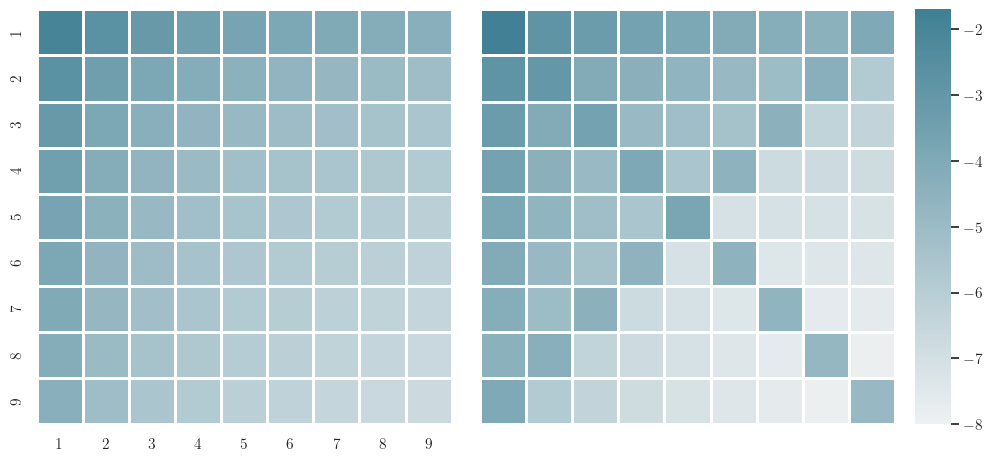

In [75]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3, 
                             sharey = False,
                             sharex = False,
                             figsize = (18,4.5),
                             gridspec_kw={'width_ratios':[12,12,1]},
                                layout='compressed') 

#the jfs with independence assumption
sbn.heatmap(
    np.log(jfs10_indep),
    square=True,
    ax=ax1,
    vmin= -8,
    vmax=-1.7,
    linewidths=1,
    xticklabels=frequencies, 
    yticklabels=frequencies,
    cbar=True,
    cbar_ax=ax3,
    cmap=sbn.color_palette("light:#408094", as_cmap=True),
)

#the true jfs
sbn.heatmap(
    np.log(jfs10),
    square=True,
    ax=ax2,
    vmin=-8,
    vmax=-1.7,
    linewidths=1,
    xticklabels=[],
    yticklabels=[],
    cmap=sbn.color_palette("light:#408094", as_cmap=True),
    cbar=False,
)

plt.show() 

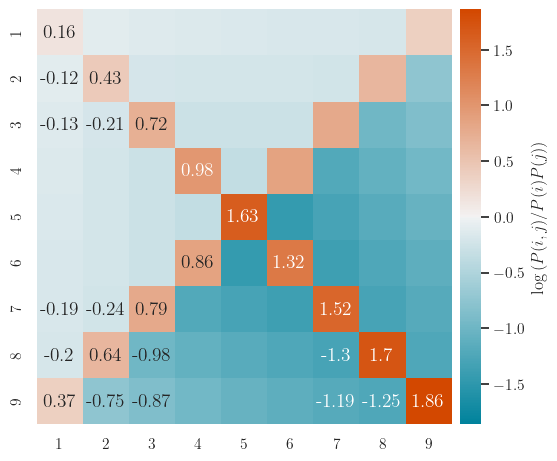

In [76]:
relative_change = np.log(jfs10 / jfs10_indep)

annotations = np.empty_like(jfs10, dtype=object)
annotations[:] = ""
annotations[:3, :3] = np.round(relative_change[:3, :3], 2).astype(str)
annotations[-3:, -3:] = np.round(relative_change[-3:, -3:], 2).astype(str)
annotations[-3:, :3] = np.round(relative_change[-3:, :3], 2).astype(str)

# some annotations can be set to null since the matrix is symmetric
annotations[0, 1:3] = ""
annotations[1, 2] = ""
annotations[-2,-1] =""
annotations[-3,-3:]=""

vmax = np.abs(relative_change).max()
vmin = -np.abs(relative_change).max()

for i in range(6):
    annotations[i, i] = f"{np.round(relative_change[i,i],2)}"
    if i >= 8-i:
      annotations[i, 8-i] = f"{np.round(relative_change[i,8-i],2)}"
    annotations[8-i, 8-i] = f"{np.round(relative_change[8-i,8-i],2)}"



fig, (ax1) = plt.subplots(1, 1,
                 sharex=False,
                 sharey=False,
                 figsize=(18, 4.5),
                 gridspec_kw={'width_ratios': [12]},
                 layout='compressed')

sbn.heatmap(
  relative_change,
  ax=ax1,
  square=True,
  vmax=vmax,
  vmin=vmin,
  cmap=sbn.diverging_palette(220, 20, s=100, as_cmap=True),
  cbar=True,
  cbar_kws={"pad":0.02, 
            "label":r"$\log \left (P(i,j)/P(i)P(j)\right)$"},
  xticklabels=frequencies,
  yticklabels=frequencies,
  annot=annotations,
  fmt=""
)
plt.show()

In [77]:
jfsGriffith = np.loadtxt(data_folder+"JFSGriffith10.csv", delimiter=',', skiprows=0)

In [78]:
(jfsGriffith-jfs10)/jfs10

array([[-0.1663, -0.0980, -0.0357,  0.0182,  0.0662,  0.1099,  0.1503,
         0.1879,  0.1393],
       [-0.0980, -0.0785, -0.0005,  0.0488,  0.0946,  0.1372,  0.1772,
         0.0991,  0.3062],
       [-0.0357, -0.0005, -0.0473,  0.0786,  0.1209,  0.1612,  0.0735,
         0.3222,  0.3472],
       [ 0.0182,  0.0488,  0.0786, -0.0383,  0.1464,  0.0574,  0.3324,
         0.3577,  0.3819],
       [ 0.0662,  0.0946,  0.1209,  0.1464, -0.0255,  0.3384,  0.3643,
         0.3889,  0.4124],
       [ 0.1099,  0.1372,  0.1612,  0.0574,  0.3384, -0.0668,  0.3929,
         0.4169,  0.4398],
       [ 0.1503,  0.1772,  0.0735,  0.3324,  0.3643,  0.3929, -0.0727,
         0.4424,  0.4648],
       [ 0.1879,  0.0991,  0.3222,  0.3577,  0.3889,  0.4169,  0.4424,
        -0.0802,  0.4880],
       [ 0.1393,  0.3062,  0.3472,  0.3819,  0.4124,  0.4398,  0.4648,
         0.4880, -0.0890]])

In [79]:
jfsDist10_5_marginal = np.sum(jfsDist10_5, axis =1)

from scipy.special import comb


expected_weight = sum(1/k for k in range(1, 10))
Griffith_marginal = np.array([1/(i*expected_weight) for i in range(1,10)])

# def p(n,k,i): 
#     return comb(n-i-1, k-2)/comb(n-1, k-1)

# for i in range(9): 
    
#     Griffith_marginal[i] = sum(2*p(10,k,i)/k for k in range(1,10))

# Griffith_marginal /= expected_weight

In [80]:
sum(Griffith_marginal)

np.float64(1.0)

In [81]:
np.abs(jfsDist10_5_marginal-Griffith_marginal)/jfsDist10_5_marginal

array([ 0.0621,  0.0251,  0.0133,  0.0356,  0.0639,  0.0886,  0.1116,
        0.1124,  0.1380])

In [82]:
np.abs(jfsDist10_5_marginal-jfs10_marginal)/jfsDist10_5_marginal

array([ 0.0023,  0.0033,  0.0018,  0.0038,  0.0002,  0.0024,  0.0051,
        0.0104,  0.0027])

In [83]:
jfs10_marginal

array([ 0.3777,  0.1807,  0.1165,  0.0850,  0.0664,  0.0542,  0.0457,
        0.0393,  0.0344])

In [84]:
Griffith_marginal

array([ 0.3535,  0.1767,  0.1178,  0.0884,  0.0707,  0.0589,  0.0505,
        0.0442,  0.0393])

In [85]:
sfs_empirical = np.array([0.3724586 , 0.17979189, 0.11663237, 0.08608661, 0.06733667,
       0.05533639, 0.04675985, 0.04028021, 0.03531741])

In [86]:
(Griffith_marginal - sfs_empirical)/(sfs_empirical)

array([-0.0509, -0.0170,  0.0103,  0.0265,  0.0499,  0.0647,  0.0799,
        0.0970,  0.1121])

In [87]:
(jfs10_marginal - sfs_empirical)/(sfs_empirical)

array([ 0.0142,  0.0050, -0.0012, -0.0125, -0.0133, -0.0197, -0.0235,
       -0.0242, -0.0254])

In [88]:
print(sum(np.abs(Griffith_marginal-sfs_empirical)))
print(sum(np.abs(jfs10_marginal - sfs_empirical)))

0.044043692862954155
0.0123638154893339


In [89]:
empirical_sfs1 = np.array([0.37307,0.17862,0.11587,0.08622,0.06729,0.05558,0.04684,0.04013,0.03639])
empirical_sfs2 = np.array([0.371955,0.180145,0.11598,0.086005,0.067205,0.055595,0.046515,0.04027,0.036335])
empirical_sfs3 = np.array([0.372082,0.179802,0.11699,0.085912,0.067334,0.055456,0.046644,0.040112,0.03567])
empirical_sfs4 = np.array([0.3724586 , 0.17979189, 0.11663237, 0.08608661, 0.06733667,
       0.05533639, 0.04675985, 0.04028021, 0.03531741])

In [90]:
empirical_sfs_arr = [empirical_sfs1, empirical_sfs2, empirical_sfs3, empirical_sfs4]

for i, arr in enumerate(empirical_sfs_arr): 
    print(f"step {i}")
    print(f"Relative error with our theory = {sum(np.abs((arr - jfs10_marginal)/arr))}")
    print(f"Relative error with Griffith's theory = {sum(np.abs((arr-Griffith_marginal)/arr))}")

step 0
Relative error with our theory = 0.1799773747829559
Relative error with Griffith's theory = 0.47395715247528736
step 1
Relative error with our theory = 0.1652073672664568
Relative error with Griffith's theory = 0.48747237760564444
step 2
Relative error with our theory = 0.1462580188856776
Relative error with Griffith's theory = 0.5003791158866374
step 3
Relative error with our theory = 0.13905033407837064
Relative error with Griffith's theory = 0.5082514160229433


In [91]:
from scipy.stats import entropy

div_from_Griffith = [entropy(pmf, qk=Griffith_marginal) for pmf in empirical_sfs_arr]
div_from_Kaveh = [entropy(pmf, qk=jfs10_marginal) for pmf in empirical_sfs_arr]
full_ent = [entropy(pmf) for pmf in empirical_sfs_arr]


In [92]:
print(div_from_Griffith)
print(div_from_Kaveh)
print(full_ent)

[np.float64(0.0012017525902346645), np.float64(0.0011896343163483084), np.float64(0.001245163309380954), np.float64(0.0012808112302702991)]
[np.float64(0.00015182904877696166), np.float64(0.0001452826745852718), np.float64(0.00011117196951625566), np.float64(9.984473511925461e-05)]
[np.float64(1.871770933757129), np.float64(1.8720949871240058), np.float64(1.8712047626972506), np.float64(1.870603418267558)]


In [93]:
jfsBN = jfsDict[(0.5,1,10,1)]
jfsBN_marginal = np.sum(jfsBN, axis=1)


In [94]:
jfsBN_marginal

array([ 0.5144,  0.2017,  0.1052,  0.0617,  0.0387,  0.0254,  0.0174,
        0.0124,  0.0093])

In [95]:
Griffith_BN = [0.2426621456314142, 0.17497762351200943, 0.1354081915876205, 0.10860911197807195, 0.08956789399995377, 0.07563333777557274, 0.0651768814475445, 0.05714138618131818, 0.050823427886494695]


In [96]:
entropy(jfsBN_marginal, qk=Griffith_BN)

np.float64(0.2528675641591139)

In [97]:
ent = 0
for i in range(9):
    for j in range(9): 
        ent += jfsGriffith[i,j]*np.log(jfsGriffith[i,j]/jfs10[i,j])

In [98]:
print(jfs10)

[[ 0.1670  0.0608  0.0385  0.0277  0.0213  0.0172  0.0143  0.0122  0.0188]
 [ 0.0608  0.0503  0.0170  0.0123  0.0096  0.0078  0.0065  0.0135  0.0029]
 [ 0.0385  0.0170  0.0279  0.0074  0.0058  0.0047  0.0117  0.0017  0.0017]
 [ 0.0277  0.0123  0.0074  0.0193  0.0040  0.0109  0.0012  0.0011  0.0011]
 [ 0.0213  0.0096  0.0058  0.0040  0.0225  0.0008  0.0008  0.0008  0.0008]
 [ 0.0172  0.0078  0.0047  0.0109  0.0008  0.0110  0.0006  0.0006  0.0006]
 [ 0.0143  0.0065  0.0117  0.0012  0.0008  0.0006  0.0096  0.0005  0.0005]
 [ 0.0122  0.0135  0.0017  0.0011  0.0008  0.0006  0.0005  0.0085  0.0004]
 [ 0.0188  0.0029  0.0017  0.0011  0.0008  0.0006  0.0005  0.0004  0.0076]]


In [99]:
print(jfsGriffith/jfs10)

[[ 0.8337  0.9020  0.9643  1.0182  1.0662  1.1099  1.1503  1.1879  1.1393]
 [ 0.9020  0.9215  0.9995  1.0488  1.0946  1.1372  1.1772  1.0991  1.3062]
 [ 0.9643  0.9995  0.9527  1.0786  1.1209  1.1612  1.0735  1.3222  1.3472]
 [ 1.0182  1.0488  1.0786  0.9617  1.1464  1.0574  1.3324  1.3577  1.3819]
 [ 1.0662  1.0946  1.1209  1.1464  0.9745  1.3384  1.3643  1.3889  1.4124]
 [ 1.1099  1.1372  1.1612  1.0574  1.3384  0.9332  1.3929  1.4169  1.4398]
 [ 1.1503  1.1772  1.0735  1.3324  1.3643  1.3929  0.9273  1.4424  1.4648]
 [ 1.1879  1.0991  1.3222  1.3577  1.3889  1.4169  1.4424  0.9198  1.4880]
 [ 1.1393  1.3062  1.3472  1.3819  1.4124  1.4398  1.4648  1.4880  0.9110]]


In [100]:
print(ent)

0.007719651360619822


In [101]:
jfs_late_BN = jfsDict[(0, 0.02, 10, 1)]
jfs_early_BN = jfsDict[(1, 2, 10, 1)]
jfs_intermediate_BN = jfsDict[(0.5, 1, 10, 1)]

jfs_late_BN_marginal = np.sum(jfs_late_BN, axis=1)
jfs_early_BN_marginal = np.sum(jfs_early_BN, axis=1)
jfs_intermediate_BN_marginal = np.sum(jfs_intermediate_BN, axis=1)

print(jfs_late_BN_marginal)

[ 0.2546  0.1785  0.1355  0.1066  0.0862  0.0713  0.0602  0.0518  0.0452]


In [102]:
filename1 = "GriffithBN.csv"
filename2 = "GriffithBN2.csv"
filename3 = "GriffithBN3.csv"

Griffith_intermediate_BN = np.loadtxt(data_folder+filename1, delimiter=',', skiprows=1)
Griffith_late_BN = np.loadtxt(data_folder+filename2, delimiter=',', skiprows=1)
Griffith_early_BN = np.loadtxt(data_folder+filename3, delimiter=',', skiprows=1)

In [103]:
print(Griffith_late_BN)

[ 0.2427  0.1750  0.1354  0.1086  0.0896  0.0756  0.0652  0.0571  0.0508]


In [104]:
print(Griffith_early_BN)
print(jfs_early_BN_marginal)

[ 0.4443  0.1981  0.1172  0.0776  0.0545  0.0397  0.0295  0.0222  0.0168]
[ 0.4401  0.1960  0.1166  0.0779  0.0553  0.0408  0.0308  0.0235  0.0182]


In [105]:
print(Griffith_late_BN)
print(jfs_late_BN_marginal)

[ 0.2427  0.1750  0.1354  0.1086  0.0896  0.0756  0.0652  0.0571  0.0508]
[ 0.2546  0.1785  0.1355  0.1066  0.0862  0.0713  0.0602  0.0518  0.0452]


In [106]:
print(Griffith_intermediate_BN)
print(jfs_intermediate_BN_marginal)

[ 0.5262  0.2042  0.1053  0.0611  0.0381  0.0251  0.0174  0.0127  0.0098]
[ 0.5144  0.2017  0.1052  0.0617  0.0387  0.0254  0.0174  0.0124  0.0093]


In [107]:
late_BN_sims = np.loadtxt(data_folder+"QnbBNlate6_v3.csv", delimiter=',', skiprows=0)
intermediate_BN_sims = np.loadtxt(data_folder+"QnbBN_intermediate_v3.csv", delimiter=',', skiprows=0)
early_BN_sims = np.loadtxt(data_folder+"QnbBN_early_v3.csv", delimiter=',', skiprows=0)
constant_sims = np.loadtxt(data_folder+"QnbBN_constant.csv", delimiter=',', skiprows=0)

In [108]:
#Calculating KL divergence between simulation and the theoretical predictions of Griffith and Kaveh

KL_divs_farid_constant = np.zeros(constant_sims.shape[0])
KL_divs_Griffiths_constant = np.zeros(constant_sims.shape[0])

KL_divs_farid_earlyBN = np.zeros(early_BN_sims.shape[0])
KL_divs_Griffiths_earlyBN = np.zeros(early_BN_sims.shape[0])

KL_divs_farid_intermediateBN = np.zeros(intermediate_BN_sims.shape[0])
KL_divs_Griffiths_intermediateBN = np.zeros(intermediate_BN_sims.shape[0])

KL_divs_farid_lateBN = np.zeros(late_BN_sims.shape[0])
KL_divs_Griffiths_lateBN = np.zeros(late_BN_sims.shape[0])



In [109]:
for idx, row in enumerate(constant_sims): 
    KL_divs_farid_constant[idx] = entropy(row, qk=jfs10_marginal)
    KL_divs_Griffiths_constant[idx] = entropy(row, qk=Griffith_marginal)

for idx, row in enumerate(early_BN_sims): 
    KL_divs_farid_earlyBN[idx] = entropy(row, qk=jfs_early_BN_marginal)
    KL_divs_Griffiths_earlyBN[idx] = entropy(row, qk=Griffith_early_BN)

for idx, row in enumerate(intermediate_BN_sims): 
    KL_divs_farid_intermediateBN[idx] = entropy(row, qk=jfs_intermediate_BN_marginal)
    KL_divs_Griffiths_intermediateBN[idx] = entropy(row, qk=Griffith_intermediate_BN)

for idx, row in enumerate(late_BN_sims): 
    KL_divs_farid_lateBN[idx] = entropy(row, qk=jfs_late_BN_marginal)
    KL_divs_Griffiths_lateBN[idx] = entropy(row, qk=Griffith_late_BN)

In [110]:
print(KL_divs_farid_constant[:20])
print(KL_divs_Griffiths_constant[:20])

[ 0.0005  0.0003  0.0002  0.0003  0.0003  0.0003  0.0003  0.0002  0.0002
  0.0002  0.0002  0.0002  0.0001  0.0001  0.0001  0.0001  0.0001  0.0001
  0.0001  0.0001]
[ 0.0020  0.0015  0.0013  0.0011  0.0010  0.0010  0.0011  0.0012  0.0012
  0.0011  0.0012  0.0012  0.0013  0.0013  0.0014  0.0013  0.0013  0.0013
  0.0013  0.0013]


In [111]:
print(KL_divs_farid_earlyBN[:30])
print(KL_divs_Griffiths_earlyBN[:30])

[ 0.0001  0.0001  0.0001  0.0001  0.0001  0.0001  0.0001  0.0000  0.0000
  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000
  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000
  0.0000  0.0000  0.0000]
[ 0.0002  0.0002  0.0003  0.0002  0.0002  0.0001  0.0001  0.0001  0.0002
  0.0001  0.0002  0.0001  0.0001  0.0001  0.0001  0.0001  0.0001  0.0001
  0.0001  0.0001  0.0002  0.0002  0.0002  0.0002  0.0002  0.0002  0.0002
  0.0002  0.0002  0.0002]


In [112]:
print(KL_divs_farid_intermediateBN[:30])
print(KL_divs_Griffiths_intermediateBN[:40])

[ 0.0003  0.0003  0.0001  0.0000  0.0001  0.0000  0.0000  0.0000  0.0000
  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000
  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000
  0.0000  0.0000  0.0000]
[ 0.0004  0.0004  0.0002  0.0001  0.0001  0.0001  0.0001  0.0001  0.0001
  0.0001  0.0001  0.0001  0.0001  0.0001  0.0001  0.0001  0.0001  0.0001
  0.0001  0.0001  0.0001  0.0001  0.0001  0.0001  0.0001  0.0001  0.0001
  0.0001  0.0001  0.0001  0.0001  0.0001  0.0001  0.0001  0.0001  0.0001
  0.0001  0.0001  0.0001  0.0001]


In [113]:
print(KL_divs_farid_lateBN[:50])
print(KL_divs_Griffiths_lateBN[0:50])

[ 0.0002  0.0001  0.0001  0.0001  0.0001  0.0001  0.0001  0.0001  0.0001
  0.0001  0.0001  0.0001  0.0001  0.0001  0.0001  0.0001  0.0001  0.0001
  0.0001  0.0001  0.0001  0.0001  0.0000  0.0000  0.0000  0.0000  0.0000
  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000
  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000
  0.0000  0.0000  0.0000  0.0000  0.0000]
[ 0.0008  0.0011  0.0012  0.0013  0.0013  0.0012  0.0012  0.0011  0.0011
  0.0011  0.0011  0.0011  0.0011  0.0012  0.0012  0.0011  0.0011  0.0011
  0.0010  0.0010  0.0010  0.0010  0.0010  0.0010  0.0011  0.0010  0.0010
  0.0010  0.0010  0.0010  0.0010  0.0010  0.0010  0.0010  0.0011  0.0011
  0.0011  0.0011  0.0010  0.0010  0.0010  0.0010  0.0010  0.0010  0.0010
  0.0010  0.0010  0.0010  0.0010  0.0010]


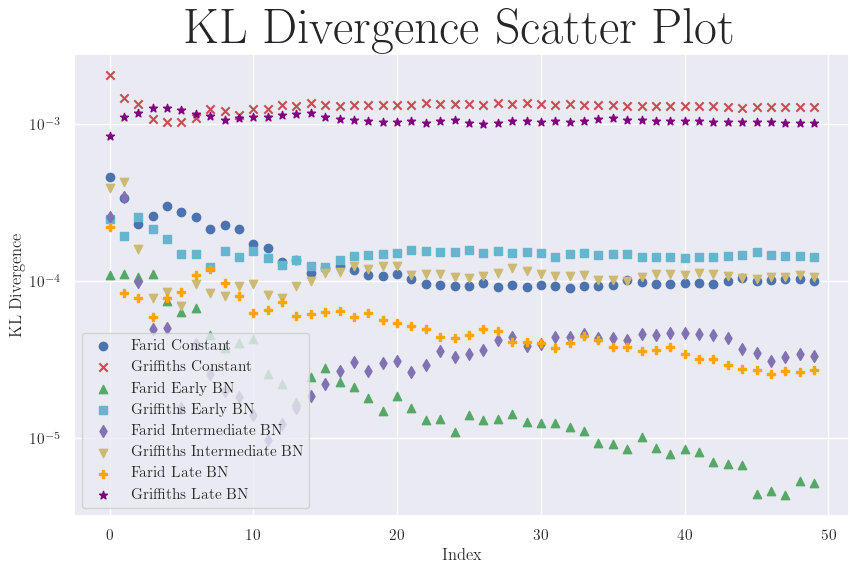

In [114]:
plt.figure(figsize=(10, 6))

plt.scatter(range(50), KL_divs_farid_constant[:50], label='Farid Constant', marker='o', color='b')
plt.scatter(range(50), KL_divs_Griffiths_constant[:50], label='Griffiths Constant', marker='x', color='r')
plt.scatter(range(50), KL_divs_farid_earlyBN[:50], label='Farid Early BN', marker='^', color='g')
plt.scatter(range(50), KL_divs_Griffiths_earlyBN[:50], label='Griffiths Early BN', marker='s', color='c')
plt.scatter(range(50), KL_divs_farid_intermediateBN[:50], label='Farid Intermediate BN', marker='d', color='m')
plt.scatter(range(50), KL_divs_Griffiths_intermediateBN[:50], label='Griffiths Intermediate BN', marker='v', color='y')
plt.scatter(range(50), KL_divs_farid_lateBN[:50], label='Farid Late BN', marker='P', color='orange')
plt.scatter(range(50), KL_divs_Griffiths_lateBN[:50], label='Griffiths Late BN', marker='*', color='purple')


plt.xlabel('Index')
plt.ylabel('KL Divergence')
plt.yscale('log')
plt.title('KL Divergence Scatter Plot')
plt.legend()
plt.show()

In [115]:
print(late_BN_sims[-1])
print(jfs_late_BN_marginal)
print(Griffith_late_BN)

[ 0.2557  0.1793  0.1367  0.1083  0.0879  0.0724  0.0611  0.0529  0.0458]
[ 0.2546  0.1785  0.1355  0.1066  0.0862  0.0713  0.0602  0.0518  0.0452]
[ 0.2427  0.1750  0.1354  0.1086  0.0896  0.0756  0.0652  0.0571  0.0508]


In [116]:
import os
import csv

def write_array_to_csv(arr, arr_name, data_folder):
    # Ensure the data_folder exists
    os.makedirs(data_folder, exist_ok=True)
    
    # Define the file path
    file_path = os.path.join(data_folder, f"{arr_name}.csv")
    
    # Write the array to the CSV file
    with open(file_path, mode='w', newline='') as file:
        writer = csv.writer(file)
        for row in arr:
            writer.writerow(row)

In [117]:
divs_farid_constant=np.zeros((KL_divs_farid_constant.shape[0], 2))
for idx, prob in enumerate(KL_divs_farid_constant): 
    divs_farid_constant[idx, :]= [(idx+1)*10000, KL_divs_farid_constant[idx]]

divs_Griffiths_constant = np.zeros((KL_divs_Griffiths_constant.shape[0], 2))
for idx, prob in enumerate(KL_divs_Griffiths_constant): 
    divs_Griffiths_constant[idx, :]= [(idx+1)*10000, KL_divs_Griffiths_constant[idx]]

divs_farid_early = np.zeros((KL_divs_farid_earlyBN.shape[0], 2))
for idx, prob in enumerate(KL_divs_farid_earlyBN): 
    divs_farid_early[idx, :]= [(idx+1)*10000, KL_divs_farid_earlyBN[idx]]

divs_farid_late = np.zeros((KL_divs_farid_lateBN.shape[0], 2))
for idx, prob in enumerate(KL_divs_farid_lateBN): 
    divs_farid_late[idx, :]= [(idx+1)*10000, KL_divs_farid_lateBN[idx]]

divs_Griffiths_early = np.zeros((KL_divs_Griffiths_earlyBN.shape[0], 2))
for idx, prob in enumerate(KL_divs_Griffiths_earlyBN): 
    divs_Griffiths_early[idx, :]= [(idx+1)*10000, KL_divs_Griffiths_earlyBN[idx]]

divs_Griffiths_late = np.zeros((KL_divs_Griffiths_lateBN.shape[0], 2))
for idx, prob in enumerate(KL_divs_Griffiths_lateBN): 
    divs_Griffiths_late[idx, :]= [(idx+1)*10000, KL_divs_Griffiths_lateBN[idx]]



In [118]:
write_array_to_csv(divs_farid_constant, "farid_constant2", data_folder=data_folder)
write_array_to_csv(divs_Griffiths_constant, "Griffiths_constant2", data_folder=data_folder)
write_array_to_csv(divs_farid_early, "farid_early2", data_folder=data_folder)
write_array_to_csv(divs_Griffiths_early, "Griffiths_early2", data_folder=data_folder)
write_array_to_csv(divs_farid_late, "farid_late2", data_folder=data_folder)
write_array_to_csv(divs_Griffiths_late, "Griffiths_late2", data_folder=data_folder)


In [119]:
jfsDict.keys()

dict_keys([(0.5, 1, 2, 1), (0.5, 1, 5, 1), (0.5, 1, 10, 1), (1, 2, 2, 1), (1, 2, 5, 1), (1, 2, 10, 1), (0, 0.02, 10, 1)])

Below I am plotting the relative error of the independent approximation to the true jfs for different bottleneck scenarios.

In [120]:
relative_error_BN1 = (jfsDict[0,0.02, 10, 1]- np.outer(marginal_dict[0,0.02, 10, 1],marginal_dict[0,0.02, 10, 1] ))/jfsDict[0,0.02, 10, 1]
relative_error_BN2 = (jfsDict[0.5,1, 10, 1]- np.outer(marginal_dict[0.5,1, 10, 1], marginal_dict[0.5,1, 10, 1]))/jfsDict[0.5,1, 10, 1]
relative_error_BN3 = (jfsDict[1,2, 10, 1]-np.outer(marginal_dict[1,2, 10, 1],marginal_dict[1,2, 10, 1]))/jfsDict[1,2, 10, 1]

print(relative_error_BN1)

[[ 0.3163 -0.2752 -0.2721 -0.2710 -0.2735 -0.2794 -0.2881 -0.2986  0.4819]
 [-0.2752  0.4563 -0.3320 -0.3305 -0.3322 -0.3369 -0.3439  0.5344 -1.8023]
 [-0.2721 -0.3320  0.5592 -0.3888 -0.3902 -0.3937  0.5607 -2.2594 -1.9004]
 [-0.2710 -0.3305 -0.3888  0.6396 -0.4590  0.5725 -2.8322 -2.3602 -1.9901]
 [-0.2735 -0.3322 -0.3902 -0.4590  0.8020 -3.5999 -2.9643 -2.4759 -2.0928]
 [-0.2794 -0.3369 -0.3937  0.5725 -3.5999  0.7248 -3.1219 -2.6130 -2.2139]
 [-0.2881 -0.3439  0.5607 -2.8322 -2.9643 -3.1219  0.7745 -2.7718 -2.3534]
 [-0.2986  0.5344 -2.2594 -2.3602 -2.4759 -2.6130 -2.7718  0.8110 -2.5093]
 [ 0.4819 -1.8023 -1.9004 -1.9901 -2.0928 -2.2139 -2.3534 -2.5093  0.8385]]


In [121]:
#function to create custom asymmetric cmaps 
from matplotlib.colors import LinearSegmentedColormap

def create_custom_diverging_cmap(saturation_factor_neg=1.0, saturation_factor_pos=2.0, 
                               base_cmap="RdBu_r"):
    """
    Creates a custom diverging colormap with different saturation rates for positive and negative values.
    
    Parameters:
    -----------
    saturation_factor_neg : float, default 1.0
        Controls how quickly negative values saturate (higher = faster)
    saturation_factor_pos : float, default 2.0
        Controls how quickly positive values saturate (higher = faster)
    base_cmap : str, default "RdBu_r"
        Base colormap to modify
    """
    # Get the base colormap
    base = plt.cm.get_cmap(base_cmap)
    
    # Create custom color values with non-linear spacing
    n_colors = 256
    colors = []
    
    for i in range(n_colors):
        # Convert to -1 to 1 range
        x = (i - n_colors/2) / (n_colors/2)
        
        # Apply different power functions for negative and positive values
        if x < 0:
            # For negative values
            x = -1 * ((-x) ** (1/saturation_factor_neg))
        else:
            # For positive values
            x = (x ** (1/saturation_factor_pos))
            
        # Convert back to 0-1 range
        idx = (x + 1) / 2
        idx = np.clip(idx, 0, 1)
        
        # Get color from base colormap
        colors.append(base(idx))
    
    return LinearSegmentedColormap.from_list("custom_diverging", colors)

/tmp/ipykernel_423988/1798215559.py:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  base = plt.cm.get_cmap(base_cmap)


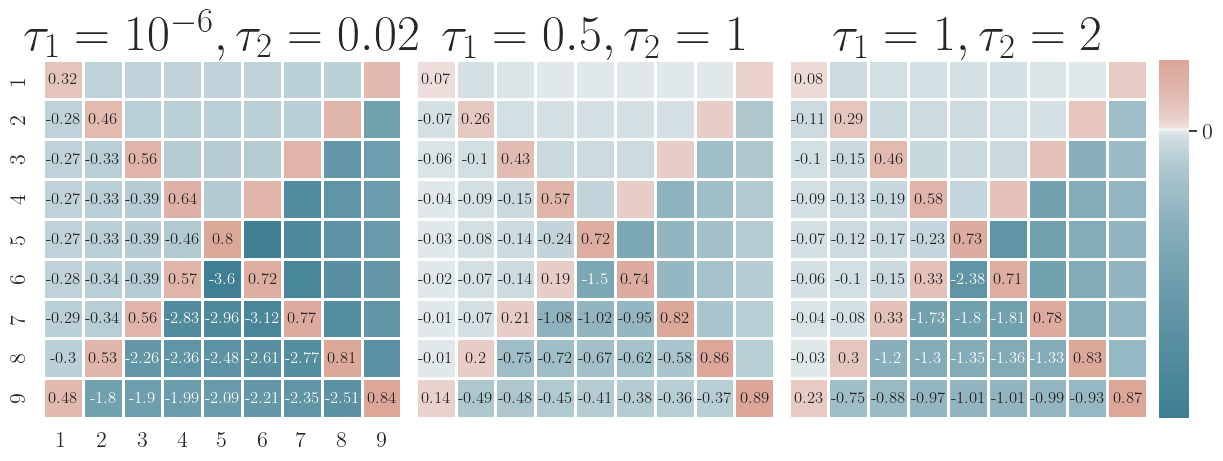

In [135]:
# Create custom colormap
custom_cmap = create_custom_diverging_cmap(
        saturation_factor_neg=2,
        saturation_factor_pos=2,
        base_cmap=sbn.diverging_palette(220, 20, as_cmap=True)
    )

fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4, 
                             sharey = False,
                             sharex = False,
                             figsize = (18,4.5),
                             gridspec_kw={'width_ratios':[12,12,12,1]},
                                layout='compressed') 

frequencies = [i for i in range(1,10)]


annotations = np.empty_like(jfs10, dtype=object)
annotations[:] = ""



all_ratios = np.concatenate((relative_error_BN1, relative_error_BN2, relative_error_BN3))
vmax = np.max(all_ratios)
vmin = np.min(all_ratios)

for i in range(annotations.shape[0]): 
    for j in range(i+1): 
        annotations[i, j]= np.round(relative_error_BN1[i,j], 2).astype(str)

sbn.diverging_palette(250, 30, l=65, center="dark", as_cmap=True)
sbn.heatmap(
    relative_error_BN1,
    ax=ax1,
    center=0,
    linewidths=1,
    square=True,
    vmin=vmin,
    vmax=vmax,
    cbar=True,
    cbar_kws={'shrink':0.4, 'orientation':'vertical',
             'ticks':[0]},
    cbar_ax=ax4,
    annot=annotations,
    fmt="",
    annot_kws={"fontsize":12},
    cmap=custom_cmap)

#change annotations for second heatmap
for i in range(annotations.shape[0]): 
    for j in range(i+1): 
        annotations[i, j]= np.round(relative_error_BN2[i,j], 2).astype(str)

sbn.heatmap(
    relative_error_BN2,
    ax=ax2,
    center=0,
    linewidths=1,
    square=True,
    vmin=vmin,
    vmax=vmax,
    xticklabels=[],
    yticklabels=[],
    cbar=False,
    annot=annotations,
    fmt="",
    annot_kws={"fontsize":12},
    cmap=custom_cmap)


#change annotations for third heatmap

for i in range(annotations.shape[0]): 
    for j in range(i+1): 
        annotations[i, j]= np.round(relative_error_BN3[i,j], 2).astype(str)

sbn.heatmap(
    relative_error_BN3,
    ax=ax3,
    center=0,
    linewidths=1,
    square=True,
    vmin=vmin,
    vmax=vmax,
    xticklabels=[],
    yticklabels=[],
    cbar=False,
    cmap=custom_cmap,
    annot=annotations,
    fmt="",
    annot_kws={"fontsize":12})

ax1.set_title(r"$\tau_1 = 10^{-6}, \tau_2 = 0.02$")
ax2.set_title(r"$\tau_1 = 0.5, \tau_2 = 1$")
ax3.set_title(r"$\tau_1 = 1, \tau_2 = 2$")
ax4.tick_params(labelsize=16)

ax1.set_xticklabels(frequencies, fontsize=16)
ax1.set_yticklabels(frequencies, fontsize=16)
plt.show()

In [123]:
Theta = 1.5
n=10

prefactor = (1-np.prod([(k-1)/(k-1+Theta) for k in range(2,n+1)])*(1+np.sum([Theta/(Theta+j-1) for j in range(2,n+1)])))
prefactor /= 1-np.prod([(k-1)/(k-1+Theta) for k in range(2,n+1)]) 

conditional_sfs = prefactor * np.ones((9,9))
conditional_sfs *= jfs10
for i in range(9): 
    conditional_sfs[i] /= jfs10_marginal[i]


In [124]:
conditional_sfs

array([[ 0.3947,  0.1436,  0.0910,  0.0654,  0.0504,  0.0406,  0.0338,
         0.0288,  0.0444],
       [ 0.3003,  0.2484,  0.0841,  0.0610,  0.0473,  0.0384,  0.0321,
         0.0666,  0.0145],
       [ 0.2950,  0.1305,  0.2140,  0.0568,  0.0444,  0.0362,  0.0897,
         0.0131,  0.0129],
       [ 0.2904,  0.1296,  0.0778,  0.2031,  0.0416,  0.1143,  0.0121,
         0.0119,  0.0117],
       [ 0.2864,  0.1287,  0.0779,  0.0532,  0.3022,  0.0114,  0.0111,
         0.0110,  0.0108],
       [ 0.2827,  0.1278,  0.0778,  0.1791,  0.0139,  0.1807,  0.0103,
         0.0102,  0.0100],
       [ 0.2795,  0.1269,  0.2289,  0.0226,  0.0162,  0.0123,  0.1873,
         0.0095,  0.0094],
       [ 0.2765,  0.3062,  0.0389,  0.0257,  0.0185,  0.0140,  0.0111,
         0.1928,  0.0088],
       [ 0.4875,  0.0759,  0.0436,  0.0289,  0.0208,  0.0158,  0.0124,
         0.0101,  0.1976]])

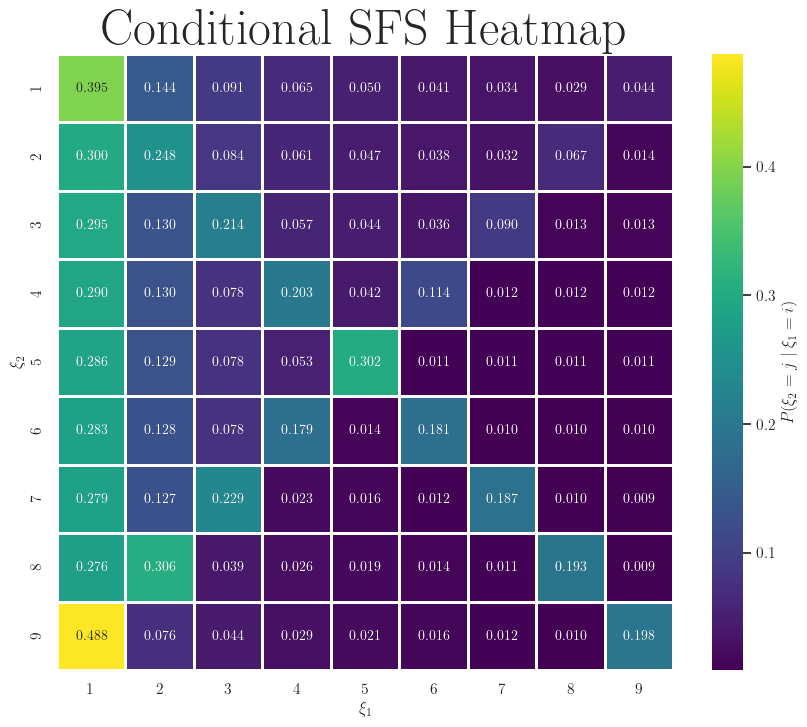

In [125]:
import seaborn as sbn
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 8))
frequencies = [i for i in range(1, 10)]

sbn.heatmap(
    conditional_sfs,
    ax=ax,
    linewidths=1,
    square=True,
    xticklabels=frequencies,
    yticklabels=frequencies,
    cbar=True,
    cmap='viridis',
    annot=True,
    fmt=".3f",
    annot_kws={"fontsize":10},
    cbar_kws={'label': r'$P(\xi_2 = j \mid \xi_1 = i)$'}
)

ax.set_title("Conditional SFS Heatmap")
ax.set_xlabel(r"$\xi_1$")
ax.set_ylabel(r"$\xi_2$")
plt.show()

In [126]:
msmsSFS = np.array([0.372082,0.179802,0.11699,0.085912,0.067334,0.055456,0.046644,0.040112,0.03567])
(msmsSFS - jfs10_marginal)/msmsSFS

array([-0.0152, -0.0050,  0.0043,  0.0105,  0.0133,  0.0218,  0.0210,
        0.0201,  0.0350])